In [58]:
# 1. Built-in modules
import os
import sys

# 2. Third-party modules
import pandas as pd
from pprint import pprint
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np

# 3. Custom modules


Notebook d'exploration des données
# 1 Informations générales
sur un chunk de 10.000 lignes

In [4]:
# load Datas/data.csv, delimiter = tab
# seules les 10000 premières lignes du fichier CSV doivent être lues.
# low_memory=False : je désactive l'inférence de données (pandas n'essaie pas d'évaliuer le type de données de chaque colonne).

df = pd.read_csv('../Datas/data.csv', delimiter = '\t',encoding="utf-8", nrows=100000, low_memory=False)
# chunksize = 10000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 206 entries, code to acidity_100g
dtypes: float64(133), int64(2), object(71)
memory usage: 15.7+ MB


In [6]:
df.shape

(10000, 206)

Le fichier compte 206 variables.

In [152]:
df.head()

code  \
0       00000000000000225   
1  0000000000000207025004   
2    00000000000003429145   
3    00000000000026772226   
4           0000000000017   

                                                                                  url  \
0  http://world-en.openfoodfacts.org/product/00000000000000225/jeunes-pousses-endives   
1              http://world-en.openfoodfacts.org/product/0000000000000207025004/andre   
2              http://world-en.openfoodfacts.org/product/00000000000003429145/l-casei   
3          http://world-en.openfoodfacts.org/product/00000000000026772226/skyr-danone   
4            http://world-en.openfoodfacts.org/product/0000000000017/vitoria-crackers   

          creator   created_t      created_datetime  last_modified_t  \
0  nutrinet-sante  1623855208  2021-06-16T14:53:28Z       1692101569   
1         kiliweb  1656948610  2022-07-04T15:30:10Z       1656948613   
2         kiliweb  1630483911  2021-09-01T08:11:51Z       1682646029   
3         kiliweb  1654250311  2022-06-03T09:58:31Z       1654270474   
4         kiliweb  1529059080  2018-06-15T10:38:00Z       1561463718   

  last_modified_datetime last_modified_by  last_updated_t  \
0   2023-08-15T12:12:49Z             digg    1.692102e+09   
1   2022-07-04T15:30:13Z          kiliweb    1.705641e+09   
2   2023-04-28T01:40:29Z        isabel626    1.682646e+09   
3   2022-06-03T15:34:34Z       quentinbrd    1.705640e+09   
4   2019-06-25T11:55:18Z          kiliweb    1.705590e+09   

  last_updated_datetime  ... glycemic-index_100g  water-hardness_100g  \
0  2023-08-15T12:12:49Z  ...                 NaN                  NaN   
1  2024-01-19T05:11:35Z  ...                 NaN                  NaN   
2  2023-04-28T01:40:29Z  ...                 NaN                  NaN   
3  2024-01-19T04:59:34Z  ...                 NaN                  NaN   
4  2024-01-18T15:01:48Z  ...                 NaN                  NaN   

  choline_100g phylloquinone_100g beta-glucan_100g inositol_100g  \
0          NaN                NaN              NaN           NaN   
1          NaN                NaN              NaN           NaN   
2          NaN                NaN              NaN           NaN   
3          NaN                NaN              NaN           NaN   
4          NaN                NaN              NaN           NaN   

  carnitine_100g sulphate_100g nitrate_100g acidity_100g  
0            NaN           NaN          NaN          NaN  
1            NaN           NaN          NaN          NaN  
2            NaN           NaN          NaN          NaN  
3            NaN           NaN          NaN          NaN  
4            NaN           NaN          NaN          NaN  

[5 rows x 206 columns]

Le dataset a été mis à jour récemment:

In [155]:
# last created
df['created_datetime'].max()

'2024-01-27T19:43:00Z'

In [156]:
# last created line
df[df['created_datetime'] == df['created_datetime'].max()]


code  \
7242  0009440846155   

                                                                             url  \
7242  http://world-en.openfoodfacts.org/product/0009440846155/vinaigrette-legere   

        creator   created_t      created_datetime  last_modified_t  \
7242  foodvisor  1706384580  2024-01-27T19:43:00Z       1706384581   

     last_modified_datetime last_modified_by  last_updated_t  \
7242   2024-01-27T19:43:01Z        foodvisor    1.706385e+09   

     last_updated_datetime  ... glycemic-index_100g  water-hardness_100g  \
7242  2024-01-27T19:43:01Z  ...                 NaN                  NaN   

     choline_100g phylloquinone_100g beta-glucan_100g inositol_100g  \
7242          NaN                NaN              NaN           NaN   

     carnitine_100g sulphate_100g nitrate_100g acidity_100g  
7242            NaN           NaN          NaN          NaN  

[1 rows x 206 columns]

In [157]:
# value of 'url' field for the last created line
df[df['created_datetime'] == df['created_datetime'].max()]['url']

7242    http://world-en.openfoodfacts.org/product/0009440846155/vinaigrette-legere
Name: url, dtype: object

In [158]:
# list of columns names
df.columns
for col in df.columns:
    print(col)


code
url
creator
created_t
created_datetime
last_modified_t
last_modified_datetime
last_modified_by
last_updated_t
last_updated_datetime
product_name
abbreviated_product_name
generic_name
quantity
packaging
packaging_tags
packaging_en
packaging_text
brands
brands_tags
categories
categories_tags
categories_en
origins
origins_tags
origins_en
manufacturing_places
manufacturing_places_tags
labels
labels_tags
labels_en
emb_codes
emb_codes_tags
first_packaging_code_geo
cities
cities_tags
purchase_places
stores
countries
countries_tags
countries_en
ingredients_text
ingredients_tags
ingredients_analysis_tags
allergens
allergens_en
traces
traces_tags
traces_en
serving_size
serving_quantity
no_nutrition_data
additives_n
additives
additives_tags
additives_en
nutriscore_score
nutriscore_grade
nova_group
pnns_groups_1
pnns_groups_2
food_groups
food_groups_tags
food_groups_en
states
states_tags
states_en
brand_owner
ecoscore_score
ecoscore_grade
nutrient_levels_tags
product_quantity
owner
data_quali

In [159]:
len(df.columns)

206

Le dataset comprend:
- 206 colonnes


In [160]:
df.sample(5)

code  \
2024  0000939474026   
1548  0000626861733   
8429       00102346   
1161  0000300000335   
7575  0009542043650   

                                                                                                                     url  \
2024                                   http://world-en.openfoodfacts.org/product/0000939474026/chips-de-banane-seeberger   
1548  http://world-en.openfoodfacts.org/product/0000626861733/rice-cracker-multi-seed-with-tamari-soy-sauce-trader-joe-s   
8429                        http://world-en.openfoodfacts.org/product/00102346/popped-chips-salt-vinegar-brown-rice-kale   
1161                                                             http://world-en.openfoodfacts.org/product/0000300000335   
7575                                     http://world-en.openfoodfacts.org/product/0009542043650/milk-chocolate-truffles   

                creator   created_t      created_datetime  last_modified_t  \
2024          foodvisor  1651641050  2022-05-04T05:10:50Z       1651641051   
1548          foodvisor  1667841026  2022-11-07T17:10:26Z       1667841026   
8429            kiliweb  1528456257  2018-06-08T11:10:57Z       1528456263   
1161       smoothie-app  1706120398  2024-01-24T18:19:58Z       1706122733   
7575  org-database-usda  1587671295  2020-04-23T19:48:15Z       1587671296   

     last_modified_datetime   last_modified_by  last_updated_t  \
2024   2022-05-04T05:10:51Z          foodvisor    1.651641e+09   
1548   2022-11-07T17:10:26Z          foodvisor    1.667841e+09   
8429   2018-06-08T11:11:03Z                NaN    1.528456e+09   
1161   2024-01-24T18:58:53Z         roboto-app    1.706123e+09   
7575   2020-04-23T19:48:16Z  org-database-usda    1.587671e+09   

     last_updated_datetime  ... glycemic-index_100g  water-hardness_100g  \
2024  2022-05-04T05:10:51Z  ...                 NaN                  NaN   
1548  2022-11-07T17:10:26Z  ...                 NaN                  NaN   
8429  2018-06-08T11:11:03Z  ...                 NaN                  NaN   
1161  2024-01-24T18:58:53Z  ...                 NaN                  NaN   
7575  2020-04-23T19:48:16Z  ...                 NaN                  NaN   

     choline_100g phylloquinone_100g beta-glucan_100g inositol_100g  \
2024          NaN                NaN              NaN           NaN   
1548          NaN                NaN              NaN           NaN   
8429          NaN                NaN              NaN           NaN   
1161          NaN                NaN              NaN           NaN   
7575          NaN                NaN              NaN           NaN   

     carnitine_100g sulphate_100g nitrate_100g acidity_100g  
2024            NaN           NaN          NaN          NaN  
1548            NaN           NaN          NaN          NaN  
8429            NaN           NaN          NaN          NaN  
1161            NaN           NaN          NaN          NaN  
7575            NaN           NaN          NaN          NaN  

[5 rows x 206 columns]

# 2  Visualisation des lacunes du dataset

<Axes: >

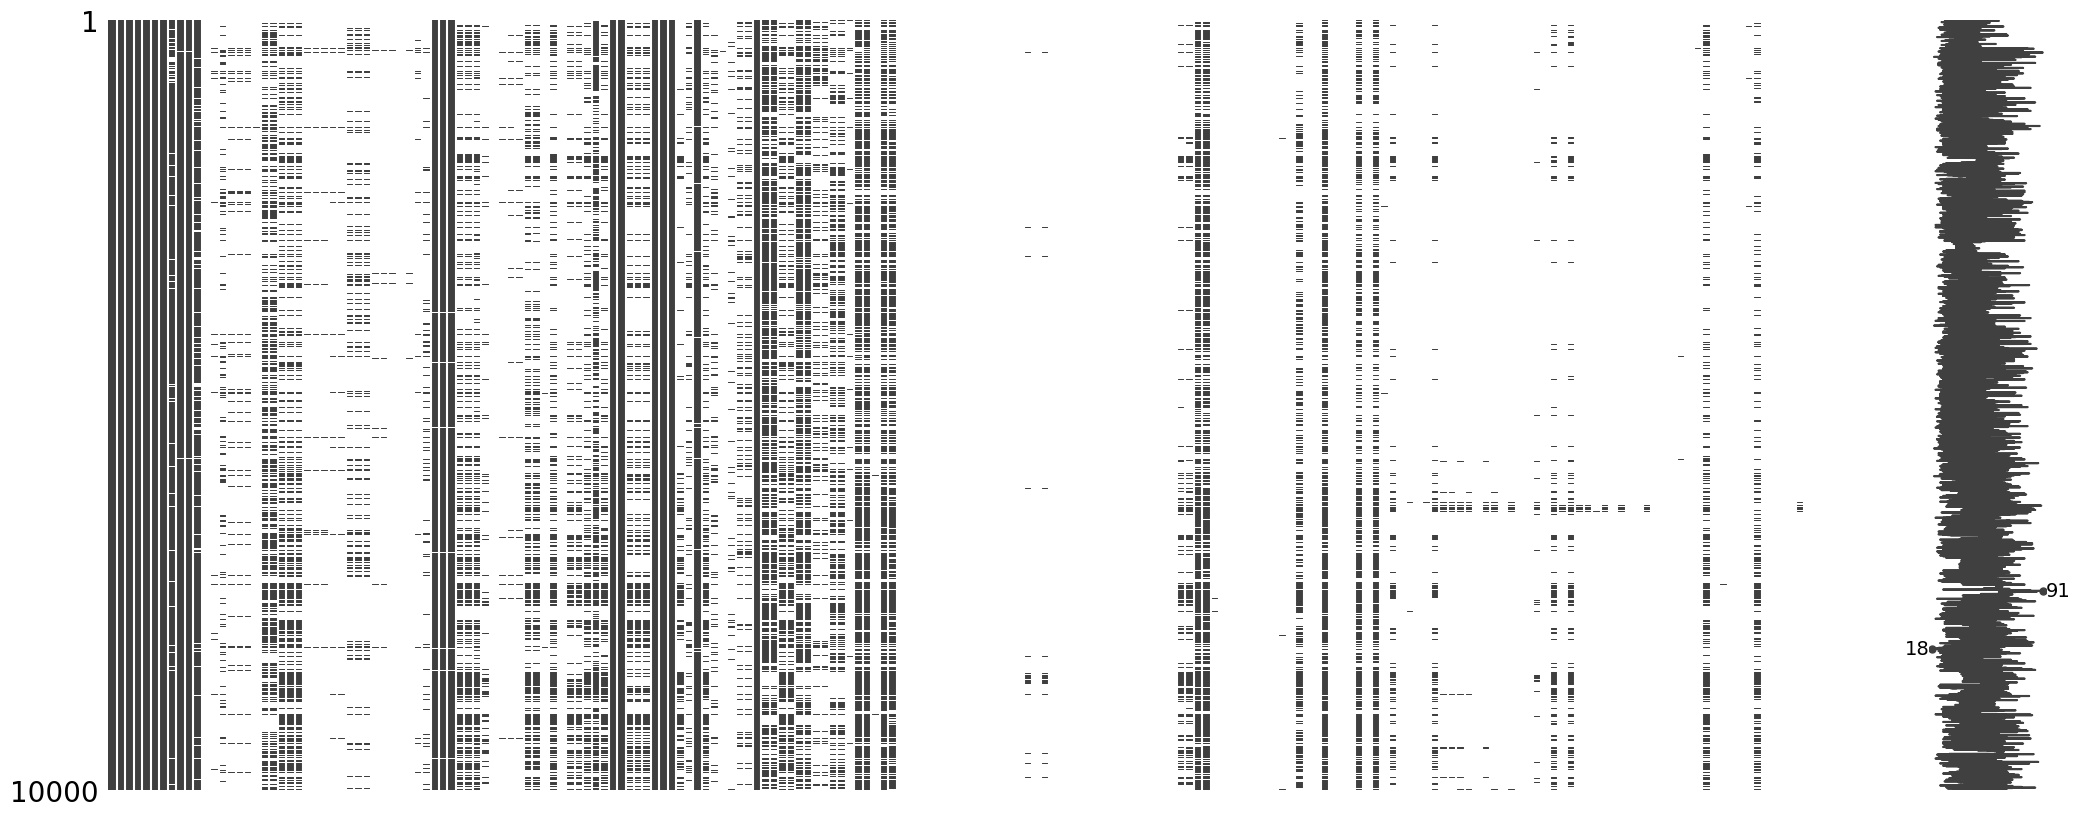

In [164]:
# affichage avec missingo
msno.matrix(df)

On remarque que ce dataset contient énormément de données manquantes

In [165]:
# afficher les noms des colonnes où il y a plus de 80% de valeurs manquantes
for col in df.columns:
    if df[col].isnull().sum() > 8000:
        print(col)

abbreviated_product_name
generic_name
quantity
packaging
packaging_tags
packaging_en
packaging_text
origins
origins_tags
origins_en
manufacturing_places
manufacturing_places_tags
labels
labels_tags
labels_en
emb_codes
emb_codes_tags
first_packaging_code_geo
cities
cities_tags
purchase_places
stores
allergens
allergens_en
traces
traces_tags
traces_en
no_nutrition_data
additives
brand_owner
ecoscore_score
product_quantity
owner
data_quality_errors_tags
unique_scans_n
popularity_tags
energy-kj_100g
energy-from-fat_100g
butyric-acid_100g
caproic-acid_100g
caprylic-acid_100g
capric-acid_100g
lauric-acid_100g
myristic-acid_100g
palmitic-acid_100g
stearic-acid_100g
arachidic-acid_100g
behenic-acid_100g
lignoceric-acid_100g
cerotic-acid_100g
montanic-acid_100g
melissic-acid_100g
unsaturated-fat_100g
monounsaturated-fat_100g
omega-9-fat_100g
polyunsaturated-fat_100g
omega-3-fat_100g
omega-6-fat_100g
alpha-linolenic-acid_100g
eicosapentaenoic-acid_100g
docosahexaenoic-acid_100g
linoleic-acid_100

In [166]:
# afficher les noms des colonnes où il y a moins de 80% de valeurs manquantes
for col in df.columns:
    if df[col].isnull().sum() < 2000:
        print(col)

code
url
creator
created_t
created_datetime
last_modified_t
last_modified_datetime
last_modified_by
last_updated_t
last_updated_datetime
product_name
countries
countries_tags
countries_en
pnns_groups_1
pnns_groups_2
states
states_tags
states_en
ecoscore_grade
completeness


In [167]:
# Afficher le nom des colonnes les plus complètes
for col in df.columns:
    if df[col].isnull().sum() < 100:
        print(col)

code
url
creator
created_t
created_datetime
last_modified_t
last_modified_datetime
last_updated_t
last_updated_datetime
pnns_groups_1
pnns_groups_2
states
states_tags
states_en
completeness


Pour chaque colonne, calcul et affichage du taux de complétion (en %)

In [6]:
def test_completion(data):
    """
    Compute sorted completion rate and number of missing values for each variable of the argument in a descending order
    
    Args:
        data(dataset) : A dataset with variables
        
    Returns:
        A specific dataframe with completion rate for each variable. 
        Schema :
            Index(string): Variable names
            Taux de completion(float): completion rate
            Nombre de valeurs manquantes(int): Number of missing values
    """
    var_dict = {}
    
    for col in data.columns:
        var_dict[col] = []
        var_dict[col].append(round((data[col].notna().sum()/data.shape[0])*100,2))
        var_dict[col].append(data[col].isna().sum())
        
    return pd.DataFrame.from_dict(data=var_dict, orient="index", columns = ["Taux de complétion", "Nombre de valeurs manquantes"]).sort_values(by="Taux de complétion", ascending=False)

In [9]:
pd.set_option('display.max_rows', 500)
test_completion(df)

Taux de complétion  \
states                                                          100.00   
states_tags                                                     100.00   
states_en                                                       100.00   
last_modified_datetime                                          100.00   
created_datetime                                                100.00   
completeness                                                    100.00   
created_t                                                       100.00   
creator                                                         100.00   
url                                                             100.00   
code                                                            100.00   
last_modified_t                                                 100.00   
pnns_groups_1                                                    99.99   
pnns_groups_2                                                    99.99   
last_updated_t                                                   99.94   
last_updated_datetime                                            99.94   
ecoscore_grade                                                   98.95   
countries_tags                                                   98.67   
countries_en                                                     98.67   
countries                                                        98.67   
last_modified_by                                                 94.91   
product_name                                                     91.81   
energy_100g                                                      75.72   
energy-kcal_100g                                                 75.14   
carbohydrates_100g                                               74.80   
proteins_100g                                                    74.80   
fat_100g                                                         74.26   
sugars_100g                                                      71.89   
last_image_t                                                     70.62   
last_image_datetime                                              70.62   
saturated-fat_100g                                               68.63   
image_url                                                        65.93   
image_small_url                                                  65.93   
nutriscore_grade                                                 65.19   
salt_100g                                                        61.55   
sodium_100g                                                      61.55   
brands                                                           52.40   
brands_tags                                                      52.40   
fiber_100g                                                       47.34   
image_nutrition_url                                              41.44   
image_nutrition_small_url                                        41.44   
categories_en                                                    39.68   
categories                                                       39.68   
categories_tags                                                  39.68   
main_category_en                                                 39.68   
main_category                                                    39.68   
serving_size                                                     37.99   
serving_quantity                                                 37.68   
ingredients_analysis_tags                                        37.42   
additives_n                                                      34.99   
ingredients_tags                                                 34.99   
ingredients_text                                                 34.99   
fruits-vegetables-nuts-estimate-from-ingredient...               34.99   
nutrient_levels_tags                                             33.56   
nova_group                                              

<Axes: >

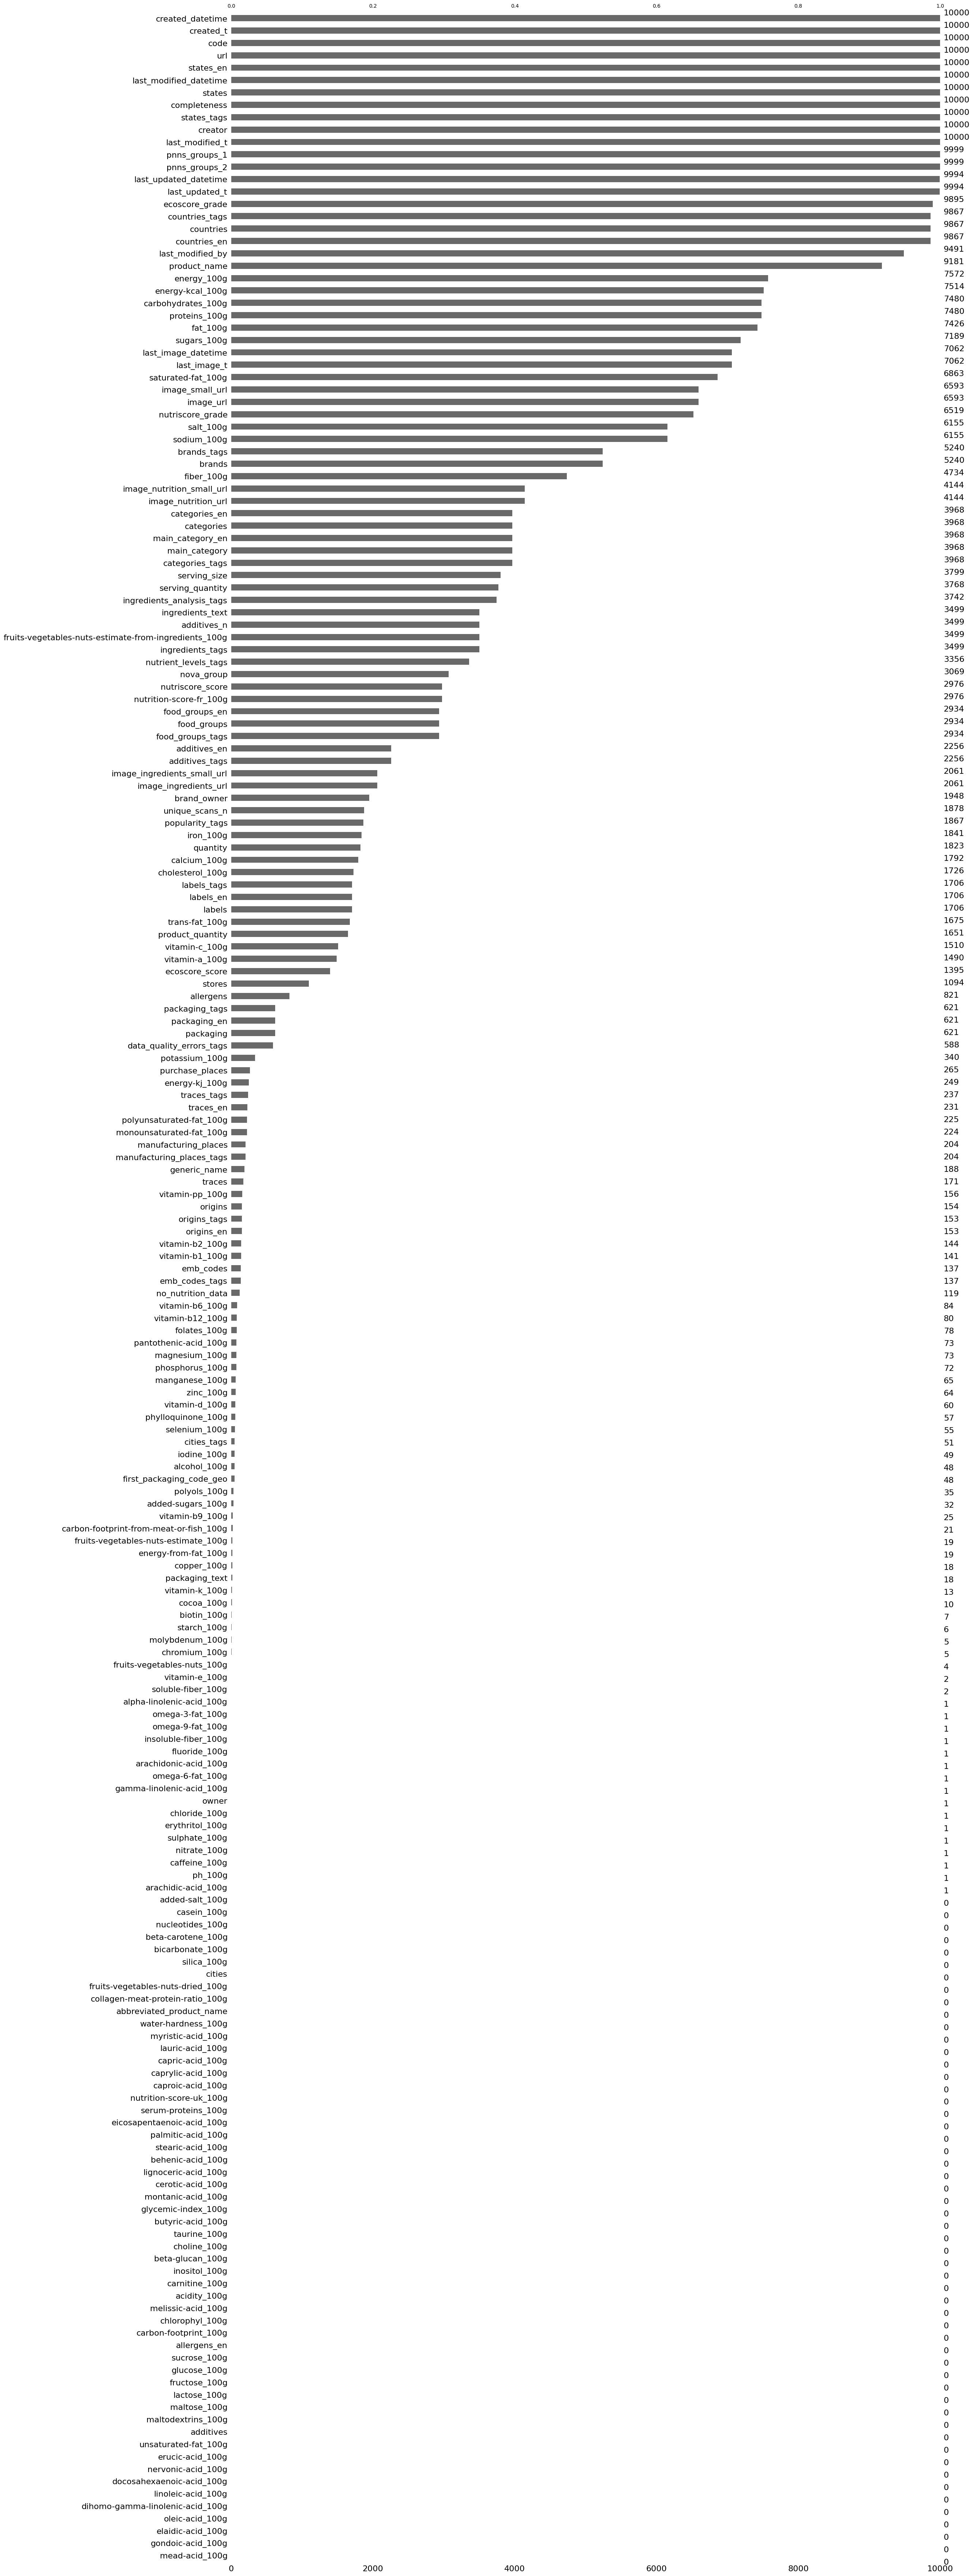

In [172]:
# Courbe du taux de complétion, fort taux de complétion en premier

msno.bar(df, sort='ascending')






On remarque que beaucoup de colonnes sont vides.

# Même calcul, mais sur l'ensemble du dataset



In [176]:
# Initialiser un dictionnaire pour stocker le nombre total de valeurs non nulles par colonne
non_null_counts = {}

# Initialiser le nombre total de lignes traitées
total_rows_processed = 0

# Charger les données par lots de 10 000 lignes
chunk_size = 10000
for chunk in pd.read_csv('Datas/data.csv', delimiter='\t', encoding="utf-8", chunksize=chunk_size, low_memory=False):
    # Mettre à jour le nombre total de lignes traitées
    total_rows_processed += len(chunk)
    
    # Calculer le nombre de valeurs non nulles par colonne dans le lot actuel
    non_null_per_column = chunk.notnull().sum()
    
    # Mettre à jour le dictionnaire des comptages de valeurs non nulles par colonne
    for col in non_null_per_column.index:
        if col in non_null_counts:
            non_null_counts[col] += non_null_per_column[col]
        else:
            non_null_counts[col] = non_null_per_column[col]

# Calculer le nombre total de lignes traitées
total_rows = total_rows_processed

# Calculer le taux de complétion pour chaque colonne
completion_rates = {col: non_null_counts[col] / total_rows for col in non_null_counts}

print("Taux de complétion par colonne :")
print(completion_rates)

Taux de complétion par colonne :
{'code': 1.0, 'url': 1.0, 'creator': 0.9999986968442781, 'created_t': 1.0, 'created_datetime': 1.0, 'last_modified_t': 1.0, 'last_modified_datetime': 1.0, 'last_modified_by': 0.9656289420460588, 'last_updated_t': 0.9920139359472899, 'last_updated_datetime': 0.9920139359472899, 'product_name': 0.9527736366384838, 'abbreviated_product_name': 0.007883766328541195, 'generic_name': 0.049801399067983025, 'quantity': 0.3176735282159277, 'packaging': 0.12381315092628309, 'packaging_tags': 0.12381087040376977, 'packaging_en': 0.12380793830339551, 'packaging_text': 0.007670048790150228, 'brands': 0.532108453831799, 'brands_tags': 0.5320612144368804, 'categories': 0.4471479133870581, 'categories_tags': 0.4471453070756143, 'categories_en': 0.4471453070756143, 'origins': 0.041184607645875254, 'origins_tags': 0.04114420981849647, 'origins_en': 0.041141277718122204, 'manufacturing_places': 0.06160473201905735, 'manufacturing_places_tags': 0.06158453310536796, 'labels'

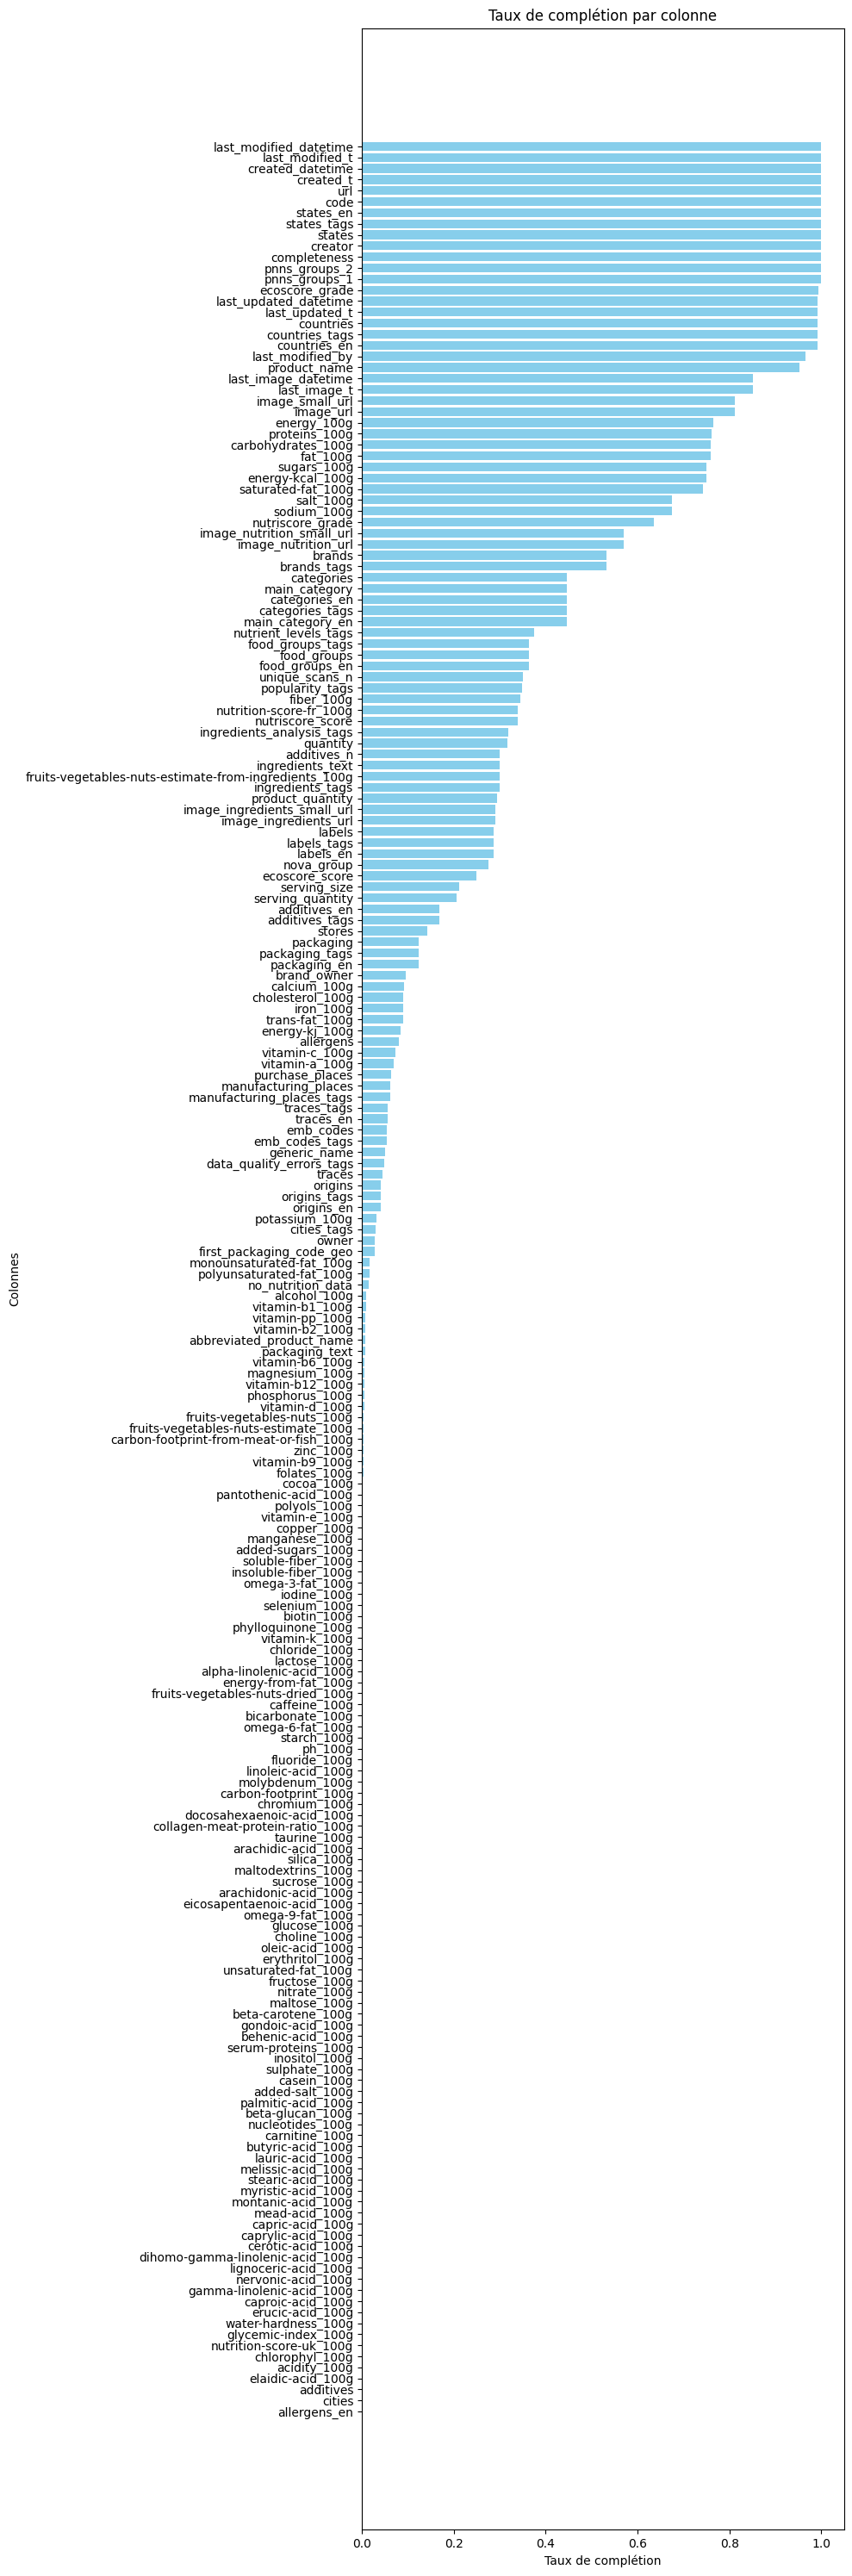

In [177]:
# Trier les colonnes par taux de complétion décroissant
sorted_columns = sorted(completion_rates, key=completion_rates.get, reverse=False)

# Extraire les taux de complétion dans l'ordre des colonnes triées
completion_values = [completion_rates[col] for col in sorted_columns]

# Créer le bar chart horizontal
plt.figure(figsize=(10, 30))
plt.barh(range(len(sorted_columns)), completion_values, color='skyblue')

# Définir les étiquettes des colonnes
plt.yticks(range(len(sorted_columns)), sorted_columns)
plt.title('Taux de complétion par colonne')
plt.xlabel('Taux de complétion')
plt.ylabel('Colonnes')

# Afficher le graphique
plt.tight_layout()
plt.show()

Taux de complétion par colonne :
{'code': 1.0, 'url': 1.0, 'creator': 0.9999986968442781, 'created_t': 1.0, 'created_datetime': 1.0, 'last_modified_t': 1.0, 'last_modified_datetime': 1.0, 'last_modified_by': 0.9656289420460588, 'last_updated_t': 0.9920139359472899, 'last_updated_datetime': 0.9920139359472899, 'product_name': 0.9527736366384838, 'abbreviated_product_name': 0.007883766328541195, 'generic_name': 0.049801399067983025, 'quantity': 0.3176735282159277, 'packaging': 0.12381315092628309, 'packaging_tags': 0.12381087040376977, 'packaging_en': 0.12380793830339551, 'packaging_text': 0.007670048790150228, 'brands': 0.532108453831799, 'brands_tags': 0.5320612144368804, 'categories': 0.4471479133870581, 'categories_tags': 0.4471453070756143, 'categories_en': 0.4471453070756143, 'origins': 0.041184607645875254, 'origins_tags': 0.04114420981849647, 'origins_en': 0.041141277718122204, 'manufacturing_places': 0.06160473201905735, 'manufacturing_places_tags': 0.06158453310536796, 'labels'

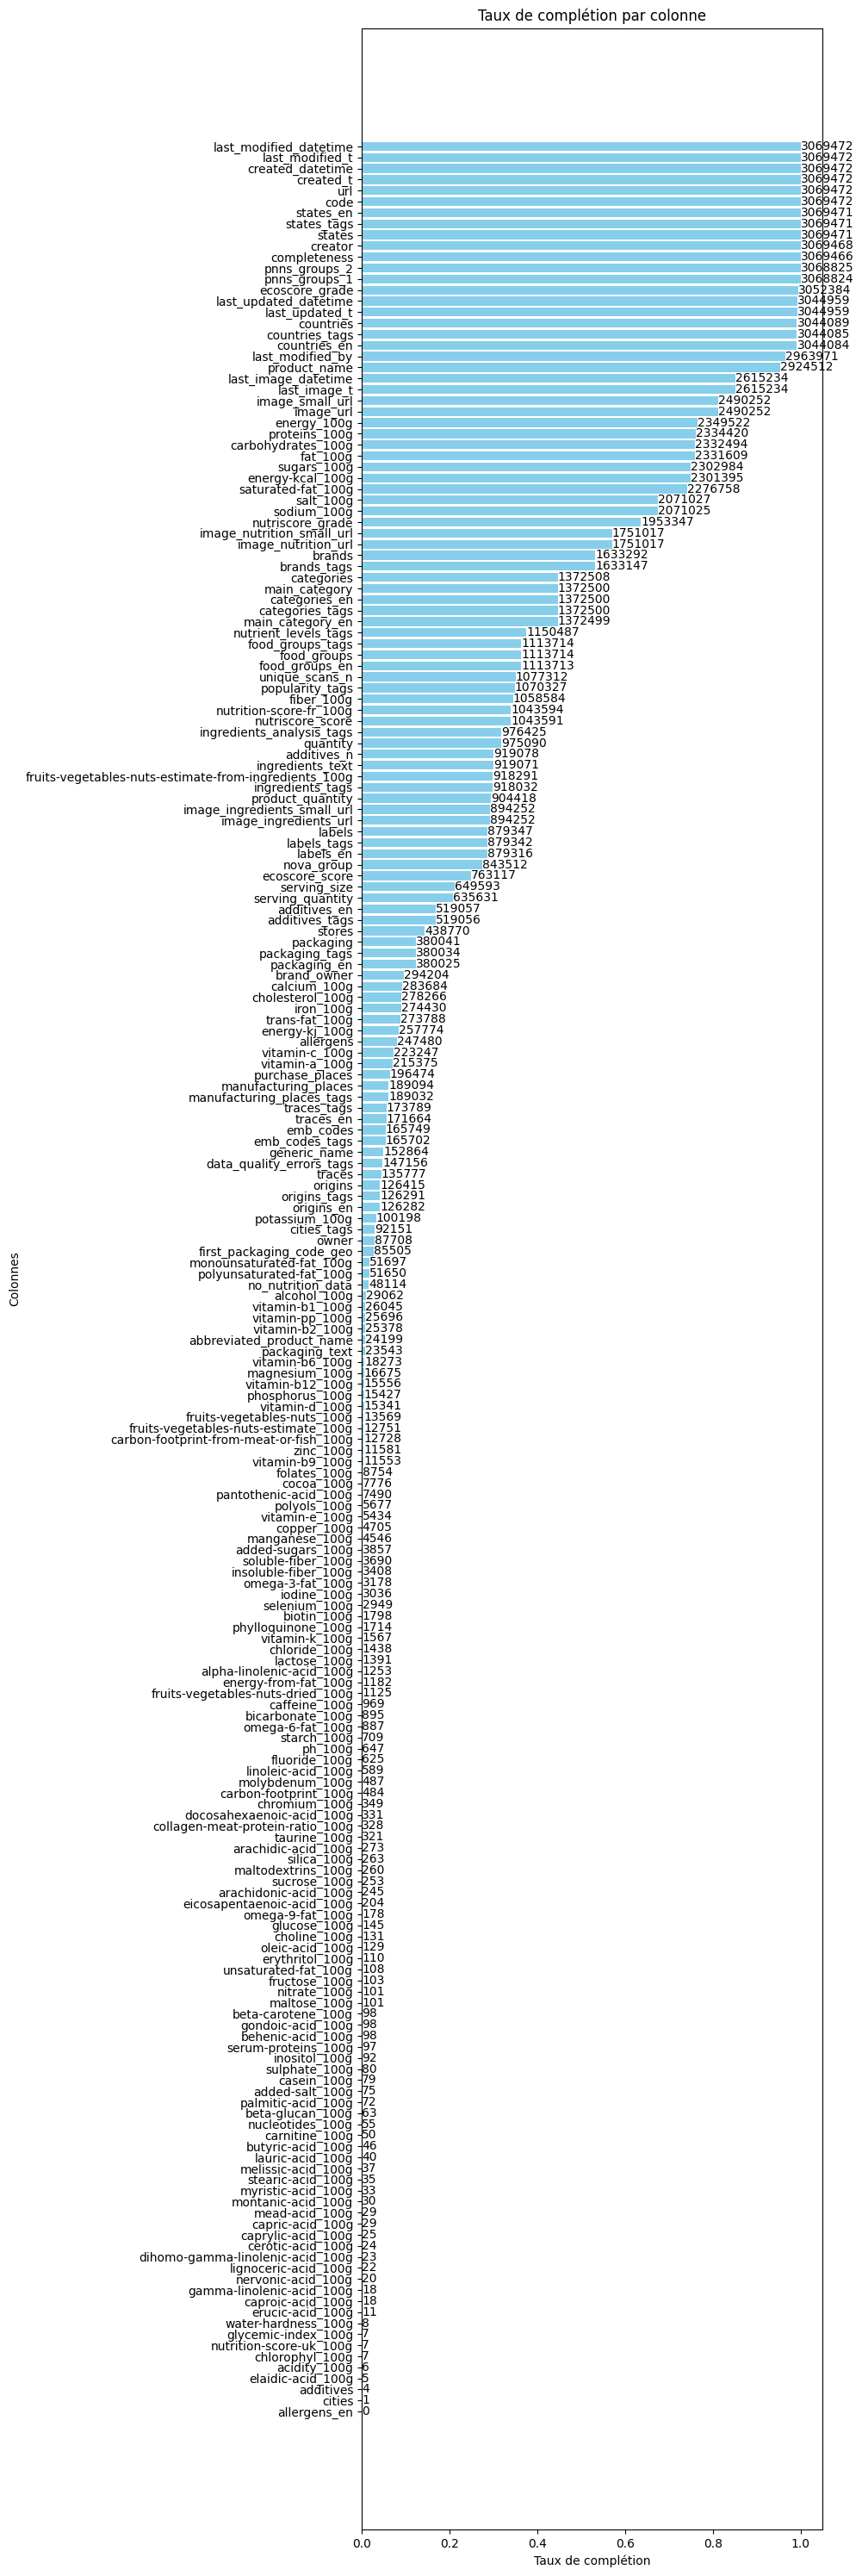

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialiser un dictionnaire pour stocker le nombre total de valeurs non nulles par colonne
non_null_counts = {}

# Initialiser le nombre total de lignes traitées
total_rows_processed = 0

# Charger les données par lots de 10 000 lignes
chunk_size = 10000
for chunk in pd.read_csv('../Datas/data.csv', delimiter='\t', encoding="utf-8", chunksize=chunk_size, low_memory=False):
    # Mettre à jour le nombre total de lignes traitées
    total_rows_processed += len(chunk)
    
    # Calculer le nombre de valeurs non nulles par colonne dans le lot actuel
    non_null_per_column = chunk.notnull().sum()
    
    # Mettre à jour le dictionnaire des comptages de valeurs non nulles par colonne
    for col in non_null_per_column.index:
        if col in non_null_counts:
            non_null_counts[col] += non_null_per_column[col]
        else:
            non_null_counts[col] = non_null_per_column[col]

# Calculer le nombre total de lignes traitées
total_rows = total_rows_processed

# Calculer le taux de complétion pour chaque colonne
completion_rates = {col: non_null_counts[col] / total_rows for col in non_null_counts}

print("Taux de complétion par colonne :")
print(completion_rates) # Trier les colonnes par taux de complétion décroissant
sorted_columns = sorted(completion_rates, key=completion_rates.get, reverse=False)

# Extraire les taux de complétion dans l'ordre des colonnes triées
completion_values = [completion_rates[col] for col in sorted_columns]

# Créer le bar chart horizontal
plt.figure(figsize=(10, 30))
bars = plt.barh(range(len(sorted_columns)), completion_values, color='skyblue')

# Définir les étiquettes des colonnes
plt.yticks(range(len(sorted_columns)), sorted_columns)
plt.title('Taux de complétion par colonne')
plt.xlabel('Taux de complétion')
plt.ylabel('Colonnes')

# Ajouter le nombre de valeurs manquantes à droite de chaque barre
for index, bar in enumerate(bars):
    plt.text(bar.get_width(), index, non_null_counts[sorted_columns[index]], va='center')

# Afficher le graphique
plt.tight_layout()
plt.show()


In [16]:
dict_completion = {'code': 1.0, 'url': 1.0, 'creator': 0.9999986968442781, 'created_t': 1.0, 'created_datetime': 1.0, 'last_modified_t': 1.0, 'last_modified_datetime': 1.0, 'last_modified_by': 0.9656289420460588, 'last_updated_t': 0.9920139359472899, 'last_updated_datetime': 0.9920139359472899, 'product_name': 0.9527736366384838, 'abbreviated_product_name': 0.007883766328541195, 'generic_name': 0.049801399067983025, 'quantity': 0.3176735282159277, 'packaging': 0.12381315092628309, 'packaging_tags': 0.12381087040376977, 'packaging_en': 0.12380793830339551, 'packaging_text': 0.007670048790150228, 'brands': 0.532108453831799, 'brands_tags': 0.5320612144368804, 'categories': 0.4471479133870581, 'categories_tags': 0.4471453070756143, 'categories_en': 0.4471453070756143, 'origins': 0.041184607645875254, 'origins_tags': 0.04114420981849647, 'origins_en': 0.041141277718122204, 'manufacturing_places': 0.06160473201905735, 'manufacturing_places_tags': 0.06158453310536796, 'labels': 0.28648151864555205, 'labels_tags': 0.2864798897008997, 'labels_en': 0.2864714191887074, 'emb_codes': 0.05399918943714098, 'emb_codes_tags': 0.0539838773574087, 'first_packaging_code_geo': 0.027856582500182442, 'cities': 3.2578893047403594e-07, 'cities_tags': 0.030021775732112885, 'purchase_places': 0.06400905432595573, 'stores': 0.14294640902409275, 'countries': 0.9917304995777776, 'countries_tags': 0.9917291964220557, 'countries_en': 0.9917288706331252, 'ingredients_text': 0.29942315811970266, 'ingredients_tags': 0.29908466342094014, 'ingredients_analysis_tags': 0.31810845643811053, 'allergens': 0.0806262445137144, 'allergens_en': 0.0, 'traces': 0.044234643612973176, 'traces_tags': 0.05661853243815223, 'traces_en': 0.055926230960894906, 'serving_size': 0.21163020871342042, 'serving_quantity': 0.20708154366614193, 'no_nutrition_data': 0.015675008600827763, 'additives_n': 0.299425438642216, 'additives': 1.3031557218961438e-06, 'additives_tags': 0.16910269909613118, 'additives_en': 0.16910302488506165, 'nutriscore_score': 0.33999039574232964, 'nutriscore_grade': 0.6363788299746667, 'nova_group': 0.274806872322015, 'pnns_groups_1': 0.9997888887730528, 'pnns_groups_2': 0.9997892145619833, 'food_groups': 0.36283569291396045, 'food_groups_tags': 0.36283569291396045, 'food_groups_en': 0.36283536712502995, 'states': 0.9999996742110695, 'states_tags': 0.9999996742110695, 'states_en': 0.9999996742110695, 'brand_owner': 0.09584840650118326, 'ecoscore_score': 0.24861507125655488, 'ecoscore_grade': 0.9944329187560597, 'nutrient_levels_tags': 0.37481592925428214, 'product_quantity': 0.29464937292146665, 'owner': 0.028574295514016742, 'data_quality_errors_tags': 0.047941795852837234, 'unique_scans_n': 0.3509763242668446, 'popularity_tags': 0.34870068858748343, 'completeness': 0.9999980452664171, 'last_image_t': 0.8520142877993349, 'last_image_datetime': 0.8520142877993349, 'main_category': 0.4471453070756143, 'main_category_en': 0.44714498128668384, 'image_url': 0.8112965356908289, 'image_small_url': 0.8112965356908289, 'image_ingredients_url': 0.29133740265426755, 'image_ingredients_small_url': 0.29133740265426755, 'image_nutrition_url': 0.570461955671855, 'image_nutrition_small_url': 0.570461955671855, 'energy-kj_100g': 0.08397991576401413, 'energy-kcal_100g': 0.7497690156482939, 'energy_100g': 0.7654482595052179, 'energy-from-fat_100g': 0.0003850825158203105, 'fat_100g': 0.7596124023936365, 'saturated-fat_100g': 0.7417425537682051, 'butyric-acid_100g': 1.4986290801805652e-05, 'caproic-acid_100g': 5.864200748532647e-06, 'caprylic-acid_100g': 8.144723261850898e-06, 'capric-acid_100g': 9.447878983747041e-06, 'lauric-acid_100g': 1.3031557218961437e-05, 'myristic-acid_100g': 1.0751034705643186e-05, 'palmitic-acid_100g': 2.3456802994130587e-05, 'stearic-acid_100g': 1.1402612566591258e-05, 'arachidic-acid_100g': 8.89403780194118e-05, 'behenic-acid_100g': 3.192731518645552e-05, 'lignoceric-acid_100g': 7.16735647042879e-06, 'cerotic-acid_100g': 7.818934331376862e-06, 'montanic-acid_100g': 9.773667914221079e-06, 'melissic-acid_100g': 1.205419042753933e-05, 'unsaturated-fat_100g': 3.518520449119588e-05, 'monounsaturated-fat_100g': 0.016842310338716235, 'omega-9-fat_100g': 5.7990429624378396e-05, 'polyunsaturated-fat_100g': 0.016826998258983955, 'omega-3-fat_100g': 0.0010353572210464862, 'omega-6-fat_100g': 0.0002889747813304699, 'alpha-linolenic-acid_100g': 0.000408213529883967, 'eicosapentaenoic-acid_100g': 6.646094181670333e-05, 'docosahexaenoic-acid_100g': 0.00010783613598690589, 'linoleic-acid_100g': 0.00019188968004920715, 'arachidonic-acid_100g': 7.98182879661388e-05, 'gamma-linolenic-acid_100g': 5.864200748532647e-06, 'dihomo-gamma-linolenic-acid_100g': 7.493145400902826e-06, 'oleic-acid_100g': 4.202677203115063e-05, 'elaidic-acid_100g': 1.6289446523701796e-06, 'gondoic-acid_100g': 3.192731518645552e-05, 'mead-acid_100g': 9.447878983747041e-06, 'erucic-acid_100g': 3.583678235214395e-06, 'nervonic-acid_100g': 6.5157786094807185e-06, 'trans-fat_100g': 0.08919709969662534, 'cholesterol_100g': 0.09065598252728808, 'carbohydrates_100g': 0.759900725597106, 'sugars_100g': 0.7502866942588171, 'added-sugars_100g': 0.0012565679048383565, 'sucrose_100g': 8.242459940993108e-05, 'glucose_100g': 4.723939491873521e-05, 'fructose_100g': 3.35562598388257e-05, 'lactose_100g': 0.000453172402289384, 'maltose_100g': 3.290468197787763e-05, 'maltodextrins_100g': 8.470512192324934e-05, 'starch_100g': 0.00023098435170609147, 'polyols_100g': 0.001849503758301102, 'erythritol_100g': 3.583678235214395e-05, 'fiber_100g': 0.34487494917692685, 'soluble-fiber_100g': 0.0012021611534491926, 'insoluble-fiber_100g': 0.0011102886750555144, 'proteins_100g': 0.7605281950771989, 'casein_100g': 2.573732550744884e-05, 'serum-proteins_100g': 3.1601526255981485e-05, 'nucleotides_100g': 1.7918391176071976e-05, 'salt_100g': 0.6747176713128512, 'added-salt_100g': 2.4434169785552693e-05, 'sodium_100g': 0.6747170197349902, 'alcohol_100g': 0.009468077897436433, 'vitamin-a_100g': 0.07016679090084549, 'beta-carotene_100g': 3.192731518645552e-05, 'vitamin-d_100g': 0.004997927982402185, 'vitamin-e_100g': 0.0017703370481959113, 'vitamin-k_100g': 0.0005105112540528143, 'vitamin-c_100g': 0.07273140136153709, 'vitamin-b1_100g': 0.008485172694196266, 'vitamin-b2_100g': 0.008267871477570084, 'vitamin-pp_100g': 0.008371472357460828, 'vitamin-b6_100g': 0.005953141126552058, 'vitamin-b9_100g': 0.003763839513766537, 'folates_100g': 0.0028519562973697106, 'vitamin-b12_100g': 0.005067972602454103, 'biotin_100g': 0.0005857684969923166, 'pantothenic-acid_100g': 0.002440159089250529, 'silica_100g': 8.568248871467144e-05, 'bicarbonate_100g': 0.00029158109277426213, 'potassium_100g': 0.03264339925563745, 'chloride_100g': 0.00046848448202166365, 'calcium_100g': 0.09242110695259641, 'phosphorus_100g': 0.005025945830422952, 'iron_100g': 0.08940625618998968, 'magnesium_100g': 0.005432530415654549, 'zinc_100g': 0.00377296160381981, 'copper_100g': 0.001532836917880339, 'manganese_100g': 0.0014810364779349672, 'fluoride_100g': 0.00020361808154627245, 'selenium_100g': 0.000960751555967932, 'chromium_100g': 0.00011370033673543854, 'molybdenum_100g': 0.0001586592091408555, 'iodine_100g': 0.000989095192919173, 'caffeine_100g': 0.0003156894736293408, 'taurine_100g': 0.00010457824668216553, 'ph_100g': 0.00021078543801670123, 'fruits-vegetables-nuts_100g': 0.004420629997602193, 'fruits-vegetables-nuts-dried_100g': 0.0003665125467832904, 'fruits-vegetables-nuts-estimate_100g': 0.004154134652474432, 'fruits-vegetables-nuts-estimate-from-ingredients_100g': 0.2991690427539329, 'collagen-meat-protein-ratio_100g': 0.00010685876919548378, 'cocoa_100g': 0.0025333347233661035, 'chlorophyl_100g': 2.2805225133182513e-06, 'carbon-footprint_100g': 0.00015768184234943338, 'carbon-footprint-from-meat-or-fish_100g': 0.004146641507073529, 'nutrition-score-fr_100g': 0.33999137310912103, 'nutrition-score-uk_100g': 2.2805225133182513e-06, 'glycemic-index_100g': 2.2805225133182513e-06, 'water-hardness_100g': 2.6063114437922876e-06, 'choline_100g': 4.267834989209871e-05, 'phylloquinone_100g': 0.0005584022268324976, 'beta-glucan_100g': 2.0524702619864263e-05, 'inositol_100g': 2.9972581603611304e-05, 'carnitine_100g': 1.6289446523701795e-05, 'sulphate_100g': 2.6063114437922874e-05, 'nitrate_100g': 3.290468197787763e-05, 'acidity_100g': 1.9547335828442155e-06}


In [18]:
# Initialiser un compteur pour les colonnes contenant moins de 1% d'enregistrements
colonnes_moins_de_1pc = 0

# Parcourir les valeurs du dictionnaire dict_completion
for valeur in dict_completion.values():
    # Vérifier si la valeur est inférieure à 1%
    if valeur < 0.01:
        # Si oui, incrémenter le compteur
        colonnes_moins_de_1pc += 1

# Calculer le pourcentage de colonnes contenant moins de 1% d'enregistrements
pourcentage = (colonnes_moins_de_1pc / len(dict_completion)) * 100

# Afficher le résultat
print(f"Pourcentage de colonnes contenant moins de 1% d'enregistrements : {pourcentage:.2f}%")


Pourcentage de colonnes contenant moins de 1% d'enregistrements : 49.51%


50% des colonnes contiennent moins de 1% d'enregistrements.


# Taux de complétion par ligne

In [181]:
# Calcul du taux de complétion moyen par ligne en pourcentage, sur le df limité à 10000 lignes.
f"taux de complétion moyen des lignes : {round((df.notnull().sum(axis=1) / len(df.columns)).mean() * 100, 1)} %"

'taux de complétion moyen des lignes : 21.3 %'

Sur cette fraction du dataset, les lignes sont complètes en moyennes à 21.3%. (100% de compéletion pour une ligne dont toutes les colonnes sont remplies.)

In [12]:
# Taux de complétion moyen des lignes de la totalité du dataset

# Initialiser le nombre total de valeurs non nulles
total_non_null_values = 0

# Initialiser le nombre total de lignes traitées
total_rows_processed = 0

# Charger les données par lots de 10 000 lignes
chunk_size = 10000
for chunk in pd.read_csv('../Datas/data.csv', delimiter='\t', encoding="utf-8", chunksize=chunk_size, low_memory=False):
    # Mettre à jour le nombre total de lignes traitées
    total_rows_processed += len(chunk)
    
    # Calculer le nombre de valeurs non nulles dans le lot actuel
    total_non_null_values += chunk.notnull().sum().sum()

# Calculer le nombre total de lignes
total_rows = total_rows_processed

# Calculer le nombre total de colonnes
total_columns = len(chunk.columns)

# Calculer le nombre total de valeurs dans le dataset
total_values = total_rows * total_columns

# Calculer le taux de complétion moyen des lignes du dataset
average_completion_rate = total_non_null_values / total_values

print("Nombre de lignes dans le dataset :", total_rows_processed)
print(f"Taux de complétion moyen des lignes du dataset : {round(average_completion_rate, 1)*100}%")

Nombre de lignes dans le dataset : 3069472
Taux de complétion moyen des lignes du dataset : 20.0%


Résumons:
- nous sommes en présence d'un dataset contenant beaucoup de vides:
    

# 3. Exploration du contenu des colonnes

Nous souhaitons à présent explorer le contenu des colonnes.
Nous écrivons une fonction permettant d'obtenir les valeurs uniques dans une colonne choisie.

In [8]:
#fonction pour obtenir les valeurs uniques d'une colonne
def get_unique_values(dataset, column_name):
    """
    Compute unique values for a given column of a dataset
    
    Args:
        dataset(dataset): A dataset with variables
        column_name(string): A column name
        
    Returns:
        A list of unique values for the given column
    """
    return list(dataset[column_name].unique())

In [8]:
get_unique_values(df, 'serving_size')

[nan,
 'serving',
 '28 g (1 ONZ)',
 '28 g (0.25 cup)',
 '35 g (0.25 cup)',
 '52 g (0.5 cup)',
 '45 g (0.25 cup)',
 '64 g (0.5 cup)',
 '40 g (40 g)',
 '14 g (1 Tbsp)',
 '48 g (0.25 cup)',
 '57 g (0.5 cup)',
 '30 g (0.25 cup)',
 '21 g (2 Tbsp)',
 '33 g (0.25 cup)',
 '55 g (0.5 cup)',
 '42 g (0.25 cup)',
 '40 g (0.25 cup)',
 '45 g (45 GRM)',
 '1.4 g (0.25 tsp)',
 '54 g (0.5 cup)',
 '30 g (30 g)',
 '51 g (0.5 cup)',
 '4 g (1 tsp)',
 '56 g (0.5 cup)',
 '100 g (100 g)',
 '47 g (0.25 cup)',
 '28 g (28 g)',
 '16 ml',
 '36 g (0.25 cup)',
 '51 g (0.25 cup)',
 '46 g (0.25 cup)',
 '65 g (0.75 cup)',
 '58 g (0.5 cup)',
 '1.5 g (0.25 tsp)',
 '31 g (0.25 cup)',
 '34 g (0.25 cup)',
 '28 g (1 oz)',
 '25 g (0.25 cup)',
 '28.4 g (1 oz)',
 '14 ml (1 Tbsp)',
 '2.5 ml (0.5 tsp)',
 '18 ml (1 Tbsp)',
 '15 ml (1 Tbsp)',
 '70 g (0.75 cup)',
 '26 g (0.25 cup)',
 '41 g (0.25 cup)',
 '38 g (38 g)',
 '50 g (0.25 cup)',
 '15 g (0.25 cup)',
 '29 g (0.25 cup)',
 '20 g (0.25 cup)',
 '48g',
 '75 g (0.5 cup)',
 '4 ml (1 

In [185]:
pprint(get_unique_values(df, 'ingredients_text'))

[nan,
 'Leche semidesnatada, azucar 6.9%, leche desnatada en polva, fermentos '
 'lacticos (contiene Lactobacidus casei), vitaminas (B6 y D).',
 'beta alanine, creatine hcl, ancient peat & apple extract (as elevatp), '
 'l-leucine, l-isoleucine, l-valine, betaine anhydrous, arginine silicate '
 'inositol (as nitrosigine), cordyceps militaris (cordyceps), ganoderma '
 'lucidum (reishi), pleurotus eryngii (king trumpet), lentinula edodes '
 "(shitake), hericium erinaceus (lion's mane), and trametes veriscolor (turkey "
 'tail) (as peako2), phyllanthus emblica (fruit) extract (as capros), '
 'nattokinase (as nsk-sd40), 1000 fu (fibronolytic units) of enzyme activity, '
 'aframomum melegueta (seed) (6-paradol 12%) (as caloriburn gp), caffeine '
 'anhydrous, methyliberine (as dynamine 40%), theacrine (as teacrine 40%), '
 'citric acid, natural & artificial flavors, malic acid, soluble corn fiber, '
 'sucralose, acesulfame potassium, calcium silicate, silicon dioxide, fd&c '
 'blue lake #1',

In [186]:
get_unique_values(df, 'categories_tags')

['en:plant-based-foods-and-beverages,en:plant-based-foods,en:fruits-and-vegetables-based-foods,en:vegetables-based-foods,en:vegetables,en:leaf-vegetables,en:spinachs,en:spinach-young-leaves',
 nan,
 'en:dairies,en:fermented-foods,en:desserts,en:fermented-milk-products,en:cheeses,en:dairy-desserts,en:fermented-dairy-desserts,en:skyrs,en:cream-cheeses',
 'en:condiments,en:sauces,en:mustards,en:groceries',
 'en:plant-based-foods-and-beverages,en:beverages,en:plant-based-beverages,en:fruit-based-beverages,en:juices-and-nectars,en:fruit-juices,en:unsweetened-beverages,en:apple-juices,en:squeezed-juices,en:squeezed-apple-juices',
 'en:snacks,en:sweet-snacks,en:confectioneries,en:marzipan,en:almond-paste',
 'en:plant-based-foods-and-beverages,en:plant-based-foods,en:fruits-and-vegetables-based-foods,en:vegetables-based-foods,en:meals,en:vegetables,en:prepared-vegetables,en:carrots,en:carrot-salads,en:grated-carrots,en:seasoned-grated-carrots',
 'en:sweet-pies,en:pies,en:coconut-pies',
 'en:pl

In [9]:
len(get_unique_values(df, 'allergens'))

87

In [188]:
# Filtrer les lignes où la colonne 'allergens' contient la valeur 'gluten'
gluten_rows = df[df['allergens'].notna() & df['allergens'].str.contains('gluten')]
gluten_rows['product_name']

50                                                                                                                                                                                                                           Baguette Poitevin
64                                                                                                                                                                                                                              Suedois saumon
82                                                                                                                                                                                                           Sandwich solene céréales sicilien
84                                                                                                                                                                                                                            BAguette bressan
471                                         

In [10]:
pd.set_option('display.max_colwidth', None)

# Filtrer les lignes où la colonne 'allergens' est vide, mais la colonne 'ingredients_text' contient la valeur 'gluten'
gluten_rows = df[df['allergens'].isna() & df['ingredients_text'].str.contains('gluten')]
print(gluten_rows['ingredients_text'])

320     milk chocolate (32%) (sugar, cocoa butter, dried whole milk, cocoa mass, dried whey (milk), dried skimmed milk, emulsifier: soya lecithin), dark chocolate (17%) (sugar, cocoa mass, cocoa butter, butter oil (milk), emulsifier: soya lecithin, vanilla flavouring), wheatflour contains gluten (with wheatflour, calcium carbonate, iron, niacin, thiamin), white chocolate (13%) (sugar, cocoa butter, dried skimmed milk, butter oil (milk), dried whole milk, emulsifier: soya lecithin, vanilla flavouring), sugar, palm oil, butter (milk), palm kernel oil, palm fat, cocoa powder, partially inverted sugar syrup, glucose syrup, cornflour, dried skimmed milk, dried whole milk, oatmeal (contains gluten), salt, ginger, raising agent: sodium bicarbonate, e450, e503, dextrose, cocoa mass, emulsifier: soya lecithin, ground ginger, pasteurised free range egg, flavourings, orange peel, molasses, lemon peel, colour: carotenes, acidity regulator: citric acid
389                                           

In [190]:
pprint(get_unique_values(df, 'traces'))

[nan,
 'en:eggs,en:milk',
 'en:eggs,en:gluten,en:milk,en:nuts,en:soybeans,en:oatmeal',
 'fr:CONTIENT : OEUF. LAIT. ANCHOIS. SOYA. BLE. SEIGLE.  ORGE. MOUTARDE.  PEUT '
 'CONTENIR : AUTRES POISSONS. MOLLUSOUES.  CRUSTACES. NOIX VARIEES. SESAME.',
 'en:gluten,en:soybeans,en:sulphur-dioxide-and-sulphites',
 'en:gluten,fr:Peut contenir:  Noix variés Soya Lait Oeuf Sésame',
 'en:milk,en:nuts,en:soybeans',
 'en:nuts,en:sesame-seeds,en:soybeans',
 'en:celery,en:crustaceans,en:eggs,en:fish,en:gluten,en:milk,en:nuts,en:soybeans,en:sulphur-dioxide-and-sulphites',
 'en:eggs',
 'en:eggs,en:gluten,en:milk,en:mustard,en:nuts,en:sesame-seeds,en:soybeans,en:sulphur-dioxide-and-sulphites',
 'en:gluten,en:nuts',
 'fr:Contient : oeufs lait blé sulfites',
 'en:sesame-seeds',
 'en:eggs,en:gluten,en:nuts,de:Alkohol',
 'en:nuts',
 'en:nuts,en:soybeans',
 'fr:chocolat',
 'en:celery,en:eggs,en:milk,en:mustard,en:soybeans',
 'en:celery',
 'en:nuts,en:peanuts',
 'en:gluten,en:yeast',
 'en:peanuts',
 'en:celery,e

In [191]:
pprint(get_unique_values(df, 'traces_tags'))

[nan,
 'en:eggs,en:milk',
 'en:gluten,en:nuts',
 'en:sesame-seeds',
 'en:eggs,en:gluten,en:milk,en:nuts,en:soybeans,en:oatmeal',
 'fr:contient-oeuf-lait-anchois-soya-ble-seigle-orge-moutarde-peut-contenir-autres-poissons-mollusoues-crustaces-noix-variees-sesame',
 'en:gluten,en:soybeans,en:sulphur-dioxide-and-sulphites',
 'en:gluten,fr:peut-contenir-noix-varies-soya-lait-oeuf-sesame',
 'en:milk,en:nuts,en:soybeans',
 'en:nuts,en:sesame-seeds,en:soybeans',
 'en:celery,en:crustaceans,en:eggs,en:fish,en:gluten,en:milk,en:nuts,en:soybeans,en:sulphur-dioxide-and-sulphites',
 'en:eggs',
 'en:eggs,en:gluten,en:milk,en:mustard,en:nuts,en:sesame-seeds,en:soybeans,en:sulphur-dioxide-and-sulphites',
 'en:eggs,en:gluten,en:milk,en:sesame-seeds,en:soybeans,en:sulphur-dioxide-and-sulphites',
 'en:milk,en:soybeans',
 'en:nuts,en:soybeans',
 'fr:contient-oeufs-lait-ble-sulfites',
 'en:eggs,en:gluten,en:nuts,de:alkohol',
 'en:eggs,en:milk,en:nuts',
 'en:nuts',
 'fr:chocolat',
 'en:celery,en:eggs,en:glu

In [7]:
pprint(get_unique_values(df, 'pnns_groups_2'))

['Vegetables',
 'unknown',
 'Dairy desserts',
 'Dressings and sauces',
 'Fruit juices',
 'Sweets',
 'One-dish meals',
 'Pizza pies and quiches',
 'Fruits',
 'Meat',
 'Sweetened beverages',
 'Cheese',
 'Bread',
 'Fish and seafood',
 'Legumes',
 'Biscuits and cakes',
 'Salty and fatty products',
 'Dried fruits',
 'Fats',
 'Pastries',
 'Unsweetened beverages',
 'Nuts',
 'Cereals',
 'Alcoholic beverages',
 'Breakfast cereals',
 'Appetizers',
 'Processed meat',
 'Milk and yogurt',
 'Sandwiches',
 'Chocolate products',
 'Eggs',
 'Plant-based milk substitutes',
 'Ice cream',
 'Soups',
 'Teas and herbal teas and coffees',
 'Potatoes',
 'Waters and flavored waters',
 'Artificially sweetened beverages',
 'Offals',
 nan]


# 3. Nettoyage préliminaire des données

## 3.1 Recherche de doublons et d'un identifiant unique

La colonne 'code' contient les numéros de code barre des produits. Celle-ci devrait-être unique. Nous chercons donc à savoir si certains produits sont contenus en double dans notre base de donnée.

In [20]:
chunks = pd.read_csv('../Datas/data.csv', delimiter = '\t',encoding="utf-8", chunksize=100000, low_memory=False)


In [21]:
# tester s'il existe des doublons dans les chunks
nb_doublons = 0
id_doublons = []
for chunk in chunks:
    nb_doublons += chunk.duplicated().sum()
    id_doublons.append(chunk[chunk.duplicated()].index)

print(f"Nombre de doublons dans la base de données : {nb_doublons}")
print(f"liste des doublons : {id_doublons}")



Nombre de doublons dans la base de données : 0
liste des doublons : [Index([], dtype='int64'), Index([], dtype='int64'), Index([], dtype='int64'), Index([], dtype='int64'), Index([], dtype='int64'), Index([], dtype='int64'), Index([], dtype='int64'), Index([], dtype='int64'), Index([], dtype='int64'), Index([], dtype='int64'), Index([], dtype='int64'), Index([], dtype='int64'), Index([], dtype='int64'), Index([], dtype='int64'), Index([], dtype='int64'), Index([], dtype='int64'), Index([], dtype='int64'), Index([], dtype='int64'), Index([], dtype='int64'), Index([], dtype='int64'), Index([], dtype='int64'), Index([], dtype='int64'), Index([], dtype='int64'), Index([], dtype='int64'), Index([], dtype='int64'), Index([], dtype='int64'), Index([], dtype='int64'), Index([], dtype='int64'), Index([], dtype='int64'), Index([], dtype='int64'), Index([], dtype='int64')]


In [22]:
# tester s'il existe des lignes dont le code barre est vide
chunks = pd.read_csv('../Datas/data.csv', delimiter = '\t',encoding="utf-8", chunksize=100000, low_memory=False)
nb_empty_barcode = 0
id_empty_barcode = []
for chunk in chunks:
    nb_empty_barcode += chunk['code'].isnull().sum()
    id_empty_barcode = chunk[chunk['code'].isnull()].index


In [23]:
print(f"Nombre de lignes dont le code barre est vide : {nb_empty_barcode}")
print(f"liste des lignes dont le code barre est vide : {id_empty_barcode}")

Nombre de lignes dont le code barre est vide : 0
liste des lignes dont le code barre est vide : Index([], dtype='int64')


Ce que nous savons à présent sur notre base de données:
- Beaucoup de lignes : 3069472
- Beaucoup de colonnes: 206
- Beaucoup de colonnes vides ou presque: 50% des colonnes contiennent moins de 1% d'enregistrements.
- Beaucoup de lignes contenant peu d'informations. Taux de complétion moyen des lignes du dataset : 20.0%

Pour autant, il ne semble pas y avoir de doublons au niveau des produits, et il n'existe pas de lignes sans code barre ce qui est une bonne chose pour une base de données. Nous pouvons utiliser le champs 'code' comme id unique.

Continuons notre exploration :

- le champ 'code' peut nous servir d'id unique

Le fichier étant très grand, j'affiche les résultats des 500.000 premières lignes, à des fins d'exploration.

In [16]:
df = pd.read_csv('../Datas/data.csv', delimiter = '\t',encoding="utf-8", nrows=500000, low_memory=False)

In [22]:
df.describe(include='number').T.round(1)

count          mean  \
created_t                                           500000.0  1.587869e+09   
last_modified_t                                     500000.0  1.633642e+09   
last_updated_t                                      498389.0  1.652493e+09   
cities                                                   0.0           NaN   
allergens_en                                             0.0           NaN   
serving_quantity                                    229912.0  9.120000e+01   
additives_n                                         241229.0  2.700000e+00   
additives                                                0.0           NaN   
nutriscore_score                                    223664.0  9.100000e+00   
nova_group                                          227706.0  3.500000e+00   
ecoscore_score                                       94707.0  4.560000e+01   
product_quantity                                     69058.0  1.159436e+06   
unique_scans_n                                       65412.0  1.700000e+00   
completeness                                        500000.0  4.000000e-01   
last_image_t                                        320733.0  1.633265e+09   
energy-kj_100g                                        5055.0  9.852000e+02   
energy-kcal_100g                                    427750.0  2.692000e+02   
energy_100g                                         428805.0  1.125400e+03   
energy-from-fat_100g                                   740.0  2.991000e+02   
fat_100g                                            427226.0  1.270000e+01   
saturated-fat_100g                                  403901.0  5.000000e+00   
butyric-acid_100g                                        6.0  3.300000e+00   
caproic-acid_100g                                        0.0           NaN   
caprylic-acid_100g                                       1.0  5.130000e+01   
capric-acid_100g                                         2.0  4.160000e+01   
lauric-acid_100g                                         3.0  1.000000e-01   
myristic-acid_100g                                       0.0           NaN   
palmitic-acid_100g                                       4.0  2.600000e+00   
stearic-acid_100g                                        3.0  0.000000e+00   
arachidic-acid_100g                                    103.0  1.100000e+00   
behenic-acid_100g                                       41.0  7.900000e+00   
lignoceric-acid_100g                                     2.0  0.000000e+00   
cerotic-acid_100g                                        1.0  1.000000e+00   
montanic-acid_100g                                       1.0  2.400000e+00   
melissic-acid_100g                                       0.0           NaN   
unsaturated-fat_100g                                     1.0  7.200000e+00   
monounsaturated-fat_100g                             33663.0  7.800000e+00   
omega-9-fat_100g                                         7.0  1.700000e+00   
polyunsaturated-fat_100g                             33661.0  5.200000e+00   
omega-3-fat_100g                                       354.0  1.500000e+00   
omega-6-fat_100g                                       133.0  2.700000e+00   
alpha-linolenic-acid_100g                              134.0  5.000000e+00   
eicosapentaenoic-acid_100g                               6.0  6.000000e-01   
docosahexaenoic-acid_100g                                6.0  3.000000e-01   
linoleic-acid_100g                                       7.0  4.900000e+00   
arachidonic-acid_100g                                   90.0  3.400000e+00   
gamma-linolenic-acid_100g                                2.0  0.000000e+00   
dihomo-gamma-linolenic-acid_100g                         0.0           NaN   
oleic-acid_100g                                          2.0  1.500000e+00   
elaidic-acid_100g                                        0.0           NaN   
gondoic-acid_100g                                       28.0  2.000000e-01   

Je constate:
- que certaines colonnes possèdent peu de valeurs, nous le savions déjà.
- il y a des valeurs min négatives: à supprimer.

En terme de champs:
- des macronutriments
- la quasi totalité des infos énergétiques sont en energy-kcal_100g (très peu en energy-kj_100g)
- je ne retrouve pas les allergenes (seulement allergens_en)

Globalement, nous disposons de données concernant

- Macronutriments (glucides, lipides, protéines...)
- Micronutriments : minéraux, vitamines, 
- l'énergétiques et le nutriscore qui pourraient être utilisés comme variables cibles pour construire un modèle.
- le nutriscore va de -15 à 40

Nous pouvons également dire que :

- certains nutriments rares sont quasi pas répertoriés et pourraient être abandonnés.

- Les données sont normalisées sur 100 grammes. Il y a quelques valeurs négatives et des valeurs supérieures à 100 à nettoyer.

--

- Les variables sont souvent déclinées en trois versions : `x`, `x_tags` et `x_en`. `x_tags` semble la plus facile à manipuler avec du code. Notez le préfixe `en:` ; cela signifie que nous avons probablement plusieurs langues dans les données
- Les variables `states` donnent des informations sur l'état d'avancement de chaque observation.

Nous pouvons également identifier certains thèmes :

- Origine, marques, étiquettes, pays
- Emballage, code Emb, lieux de fabrication
- Ingrédients, allergènes, traces, additifs
- Huile de palme

Et quelques variables de classification intéressantes :

- `categories`, `main_category`, `pnns_groups`, `pnns_groups`.
- `pnns_groups`
- `nutrition_grade` (pourrait être une variable cible pour construire un modèle)


Supprimons les données incohérentes.
Nous n'allons pas imputer de valeurs. Cette base de donnée étant collaborative, les valeurs abérrentes proviennent probablement d'erreurs de saisie.

In [ ]:
# si le nom de la colonne contient '_100g' alors on supprime les lignes dont la valeur est soit négative, soit supérieure à 100.

chunks = pd.read_csv('../Datas/data.csv', delimiter='\t', encoding="utf-8", chunksize=100000, low_memory=False)
filtered_chunks = []

for chunk in chunks:
    for col in chunk.columns:
        if '_100g' in col:
            chunk = chunk[(chunk[col] >= 0) & (chunk[col] <= 100)]
    filtered_chunks.append(chunk)

filtered_data = pd.concat(filtered_chunks, ignore_index=True)





# 4. D'où proviennent les données ?

In [31]:
# Définir le chemin du fichier CSV
file_path = '../Datas/data.csv'
# Définir le nom de la colonne
column = 'creator'

# Définir les paramètres de lecture par chunks
chunks = pd.read_csv(file_path, delimiter='\t', encoding="utf-8", chunksize=100000, low_memory=False)

# Dictionnaire pour stocker les comptages globaux et les pourcentages
global_counts = {}
total_rows = 0

# Parcourir les chunks
for chunk in chunks:
    # Compter les occurrences de chaque valeur dans la colonne spécifique
    counts = chunk[column].value_counts().to_dict()
    total_rows += len(chunk)  # Ajouter le nombre de lignes du chunk au total
    
    # Mettre à jour le dictionnaire global de comptage
    for key, value in counts.items():
        if key in global_counts:
            global_counts[key] += value
        else:
            global_counts[key] = value

# Calculer les pourcentages
for key in global_counts:
    global_counts[key] /= total_rows
    global_counts[key] *= 100  # Convertir en pourcentage

# Sélectionner les 20 valeurs les plus fréquentes
top_20_values = sorted(global_counts.items(), key=lambda x: x[1], reverse=True)[:20]

# Afficher les 20 occurrences les plus fréquentes avec leurs pourcentages
for value, percentage in top_20_values:
    print(f"Valeur: {value}, Pourcentage: {percentage:.2f}%")


Valeur: kiliweb, Pourcentage: 60.38%
Valeur: openfoodfacts-contributors, Pourcentage: 6.35%
Valeur: usda-ndb-import, Pourcentage: 5.53%
Valeur: org-database-usda, Pourcentage: 4.38%
Valeur: foodvisor, Pourcentage: 3.52%
Valeur: prepperapp, Pourcentage: 2.63%
Valeur: smoothie-app, Pourcentage: 1.47%
Valeur: foodless, Pourcentage: 1.39%
Valeur: elcoco, Pourcentage: 1.20%
Valeur: inf, Pourcentage: 1.11%
Valeur: date-limite-app, Pourcentage: 1.06%
Valeur: waistline-app, Pourcentage: 0.74%
Valeur: nutrinet-sante, Pourcentage: 0.48%
Valeur: openfood-ch-import, Pourcentage: 0.37%
Valeur: sebleouf, Pourcentage: 0.34%
Valeur: halal-app-chakib, Pourcentage: 0.33%
Valeur: swipe-studio, Pourcentage: 0.31%
Valeur: tacite, Pourcentage: 0.29%
Valeur: insectproductadd, Pourcentage: 0.20%
Valeur: tacinte, Pourcentage: 0.19%


In [ ]:
# utilisation de get_top_occurencies() sur l'ensemble du dataset, par chunks


                            count  count %
creator                                   
kiliweb                     35195    35.20
usda-ndb-import             27282    27.28
org-database-usda           22313    22.31
openfoodfacts-contributors   3931     3.93
foodvisor                    2755     2.76
inf                          1742     1.74
smoothie-app                  896     0.90
waistline-app                 664     0.66
foodless                      534     0.53
swipe-studio                  464     0.46
kiliweb                     34401    34.40
usda-ndb-import             30034    30.03
org-database-usda           25458    25.46
openfoodfacts-contributors   2596     2.60
foodvisor                    1698     1.70
inf                          1421     1.42
smoothie-app                  568     0.57
waistline-app                 449     0.45
foodless                      429     0.43
swipe-studio                  294     0.29
kiliweb                     55942    55.94
usda-ndb-im

In [33]:
# Définir le chemin du fichier CSV
file_path = '../Datas/data.csv'
# Définir le nom de la colonne
column = 'creator'

# Charger uniquement la colonne spécifiée en tant que DataFrame
column_df = pd.read_csv(file_path, delimiter='\t', encoding="utf-8", usecols=[column], low_memory=False)

# Compter les occurrences de chaque valeur dans la colonne
value_counts = column_df[column].value_counts()

# Sélectionner les 20 valeurs les plus fréquentes
top_20_values = value_counts.head(20)

# Afficher les 20 occurrences les plus fréquentes
print(top_20_values)

5. Etude de l'évolution du dataset au cours du temps


<Axes: xlabel='created_datetime'>

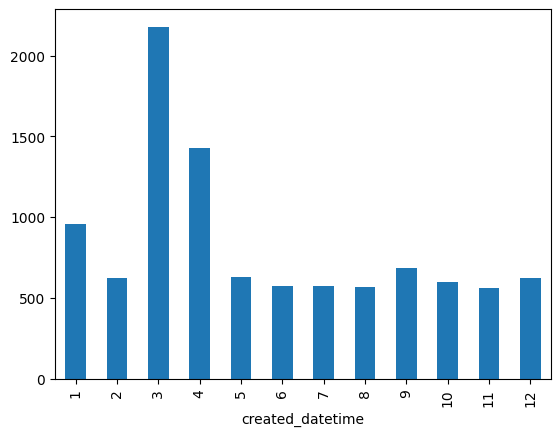

In [6]:
# Tracer la courbe d'ajout de produits par année
df['created_datetime'] = pd.to_datetime(df['created_datetime'])
df['created_datetime'].groupby(df['created_datetime'].dt.month).count().plot(kind="bar")


In [22]:
print(get_unique_values(df, 'traces'))

[nan, 'en:eggs,en:milk', 'en:eggs,en:gluten,en:milk,en:nuts,en:soybeans,en:oatmeal', 'fr:CONTIENT : OEUF. LAIT. ANCHOIS. SOYA. BLE. SEIGLE.  ORGE. MOUTARDE.  PEUT CONTENIR : AUTRES POISSONS. MOLLUSOUES.  CRUSTACES. NOIX VARIEES. SESAME.', 'en:gluten,en:soybeans,en:sulphur-dioxide-and-sulphites', 'en:gluten,fr:Peut contenir:  Noix variés Soya Lait Oeuf Sésame', 'en:milk,en:nuts,en:soybeans', 'en:nuts,en:sesame-seeds,en:soybeans', 'en:celery,en:crustaceans,en:eggs,en:fish,en:gluten,en:milk,en:nuts,en:soybeans,en:sulphur-dioxide-and-sulphites', 'en:eggs', 'en:eggs,en:gluten,en:milk,en:mustard,en:nuts,en:sesame-seeds,en:soybeans,en:sulphur-dioxide-and-sulphites', 'en:gluten,en:nuts', 'fr:Contient : oeufs lait blé sulfites', 'en:sesame-seeds', 'en:eggs,en:gluten,en:nuts,de:Alkohol', 'en:nuts', 'en:nuts,en:soybeans', 'fr:chocolat', 'en:celery,en:eggs,en:milk,en:mustard,en:soybeans', 'en:celery', 'en:nuts,en:peanuts', 'en:gluten,en:yeast', 'en:peanuts', 'en:celery,en:eggs,en:milk,en:mustard,e

In [21]:
len('starch-modified, salt, dextrose, potassium sorbate (preservative), cinnamon, ')

77

In [57]:
def get_unique_values_and_maxlength(dataset, column_name):
    """
    Compute unique values and maximum length for a given column of a dataset
    
    Args:
        dataset(dataset): A dataset with variables
        column_name(string): A column name
        
    Returns:
        A tuple containing a list of unique values for the given column
        and the maximum length of the values
    """
    unique_values = list(dataset[column_name].unique())
    max_length = max([len(str(value)) for value in unique_values])
    return  max_length, unique_values


In [17]:
get_unique_values_and_maxlength(df, 'main_category_en')

(256,
 ['Spinach young leaves',
  nan,
  'Cream cheeses',
  'Groceries',
  'Squeezed apple juices',
  'Almond paste',
  'Seasoned grated carrots',
  'Coconut pies',
  'Pear compotes',
  'fr:Aiguillettes de poulet',
  'Vegetables macedoines',
  'Milk jams',
  'White teas',
  'Apricot nectars',
  'Abondance',
  'Chicken thighs',
  'Bagel breads',
  'Baguettes',
  'fr:paves-de-saumon-fume',
  'Mung beans',
  'Corned-beef',
  'Cheeses',
  'Thyme honeys',
  'Salmon steaks',
  'fr:Fromages blancs',
  'Shortbread cookies from Brittany',
  'Blackberry jams',
  'fr:miels-de-printemps',
  'Salads',
  'Wild boar rillettes',
  'Dried mixed fruits',
  'Dietary supplements',
  'Duck rillettes',
  'fr:filet-de-boeuf',
  'Hazelnut spreads',
  'Butter beans',
  'Bars covered with chocolate',
  'Cranberries',
  'Teas',
  'Food decorations',
  'Honeys',
  'Honey of Corsica',
  'Huile-d-olive-vierge-extra',
  'Turkey dishes',
  'Microwave meals',
  'Leaf vegetables',
  'Flavoured olive oils',
  'fr:gateau

- tout ce qui contient 'url' doit être en 'VARCHAR(255)'
- tout ce qui contient '_100g' doit être en 'FLOAT'
- 'code' en 'VARCHAR(20)'
- 'creator' en VARCHAR(100)
- 'created_t: actuellement en timestamp unix doit être passé en datetime sql.
- 'created_datetime' : actuellement en ISO 8601 ("2023-08-15T12:12:49Z") doit être passé en datetime sql
- 'last_modified_t': actuellement en timestamp unix doit être passé en datetime sql.
- 'last_modified_datetime': actuellement en ISO 8601 ("2023-08-15T12:12:49Z") doit être passé en datetime sql
- 'last_modified_by'en VARCHAR(100)
- 'last_updated_t': actuellement en timestamp unix doit être passé en datetime sql.
- 'last_updated_datetime': actuellement en ISO 8601 ("2023-08-15T12:12:49Z") doit être passé en datetime sql
- 'product_name' en VARCHAR(255)
- 'abbreviated_product_name' en VARCHAR(255)
-  'generic_name' en VARCHAR(255)
-  'quantity' en VARCHAR(100)
-  'packaging' en VARCHAR(500)
-  'packaging_tags'en VARCHAR(500)
- 
 - 'packaging_en': VARCHAR(500)
 - 'packaging_text': VARCHAR(500)
 - 'brands': VARCHAR(255)
 - 'brands_tags': VARCHAR(255)
 - 'categories': VARCHAR(255)
 - 'categories_tags': VARCHAR(255)
 - 'categories_en': VARCHAR(255)
 - 'origins': VARCHAR(255)
 - 'origins_tags': VARCHAR(255)
 - 'origins_en': VARCHAR(255)
 - 'manufacturing_places': VARCHAR(255),
 - 'manufacturing_places_tags': VARCHAR(255)
 - 'labels': VARCHAR(255)
 - 'labels_tags': VARCHAR(255)
 - 'labels_en': VARCHAR(255)
 - 'emb_codes': VARCHAR(255)
 - 'emb_codes_tags': VARCHAR(255)
 - 'first_packaging_code_geo': VARCHAR(255)
 - 'cities': VARCHAR(255)
 - 'cities_tags': VARCHAR(255)
 - 'purchase_places': VARCHAR(255)
 - 'stores': VARCHAR(255)
 - 'countries': VARCHAR(255)
 - 'countries_tags': VARCHAR(255)
 - 'countries_en': VARCHAR(255)
 - 'ingredients_text': VARCHAR(500)
 - 'ingredients_tags': VARCHAR(500)
 - 'ingredients_analysis_tags': VARCHAR(500)
 - 'allergens': VARCHAR(255)
 - 'allergens_en': VARCHAR(100)
 - 'traces': VARCHAR(500)
 - 'traces_tags': VARCHAR(500),
 - 'traces_en': VARCHAR(500),
 - 'serving_size': VARCHAR(255),
 - 'serving_quantity': FLOAT
 - 'no_nutrition_data': VARCHAR(10)
 - 'additives_n': FLOAT,
 - 'additives': FLOAT
 - 'additives_tags': VARCHAR(500)
 - 'additives_en': VARCHAR(100)
 - 'nutriscore_score': FLOAT
 - 'nutriscore_grade': VARCHAR(25)
 - 'nova_group': FLOAT,
 - 'pnns_groups_1': VARCHAR(100),
 - 'pnns_groups_2': VARCHAR(100),
 - 'food_groups': VARCHAR(50)
 - 'food_groups_tags': VARCHAR(100)
 - 'food_groups_en': VARCHAR(100)
 - 'states': VARCHAR(600)
 - 'states_tags': VARCHAR(600)
 - 'states_en': VARCHAR(500),
 - 'brand_owner': VARCHAR(255),
 - 'ecoscore_score': FLOAT
 - 'ecoscore_grade': VARCHAR(20)
 - 'nutrient_levels_tags': VARCHAR(255)
 - 'product_quantity': FLOAT
 - 'owner': VARCHAR(100),
 - 'data_quality_errors_tags': VARCHAR(500)
 - 'unique_scans_n': FLOAT
 - 'popularity_tags': 'VARCHAR(6000)',
 - 'completeness': 'float64',
 - 'last_image_t': 'float64',
 - 'last_image_datetime': 'object',
 - 'main_category': 'object',
 - 'main_category_en': 'object',
 - 'image_url': 'object',
 - 'image_small_url': 'object',
 - 'image_ingredients_url': 'object',
 - 'image_ingredients_small_url': 'object',
 - 'image_nutrition_url': 'object',
 - 'image_nutrition_small_url': 'object',
- 
- 
- 
- 

- tout ce qui contient 'url' doit être en 'VARCHAR(255)'
- tout ce qui contient '_100g' doit être en 'FLOAT'
- 'code' en 'VARCHAR(20)'
- 'creator' en VARCHAR(100)
- 'created_t: actuellement en timestamp unix doit être passé en datetime sql.
- 'created_datetime' : actuellement en ISO 8601 ("2023-08-15T12:12:49Z") doit être passé en datetime sql
- 'last_modified_t': actuellement en timestamp unix doit être passé en datetime sql.
- 'last_modified_datetime': actuellement en ISO 8601 ("2023-08-15T12:12:49Z") doit être passé en datetime sql
- 'last_modified_by'en VARCHAR(100)
- 'last_updated_t': actuellement en timestamp unix doit être passé en datetime sql.
- 'last_updated_datetime': actuellement en ISO 8601 ("2023-08-15T12:12:49Z") doit être passé en datetime sql
- 'product_name' en VARCHAR(255)
- 'abbreviated_product_name' en VARCHAR(255)
-  'generic_name' en VARCHAR(255)
-  'quantity' en VARCHAR(100)
-  'packaging' en VARCHAR(100)
-  'packaging_tags'
- 
 - 'packaging_en': VARCHAR(255)
 - 'packaging_text': VARCHAR(255)
 - 'brands': VARCHAR(255)
 - 'brands_tags': VARCHAR(255)
 - 'categories': VARCHAR(255)
 - 'categories_tags': VARCHAR(255)
 - 'categories_en': VARCHAR(255)
 - 'origins': VARCHAR(255)
 - 'origins_tags': VARCHAR(255)
 - 'origins_en': VARCHAR(255)
 - 'manufacturing_places': VARCHAR(255),
 - 'manufacturing_places_tags': VARCHAR(255)
 - 'labels': VARCHAR(255)
 - 'labels_tags': VARCHAR(255)
 - 'labels_en': VARCHAR(255)
 - 'emb_codes': VARCHAR(255)
 - 'emb_codes_tags': VARCHAR(255)
 - 'first_packaging_code_geo': VARCHAR(255)
 - 'cities': VARCHAR(255)
 - 'cities_tags': VARCHAR(255)
 - 'purchase_places': VARCHAR(255)
 - 'stores': VARCHAR(255)
 - 'countries': VARCHAR(255)
 - 'countries_tags': VARCHAR(255)
 - 'countries_en': VARCHAR(255)
 - 'ingredients_text': VARCHAR(500)
 - 'ingredients_tags': VARCHAR(500)
 - 'ingredients_analysis_tags': VARCHAR(500)
 - 'allergens': VARCHAR(255)
 - 'allergens_en': VARCHAR(100)
 - 'traces': VARCHAR(500)
 - 'traces_tags': VARCHAR(500),
 - 'traces_en': VARCHAR(500),
 - 'serving_size': 'object',
 - 'serving_quantity': 'float64',
 - 'no_nutrition_data': 'object',
 - 'additives_n': 'float64',
 - 'additives': 'float64',
 - 'additives_tags': 'object',
 - 'additives_en': 'object',
 - 'nutriscore_score': 'float64',
 - 'nutriscore_grade': 'object',
 - 'nova_group': 'float64',
 - 'pnns_groups_1': 'object',
 - 'pnns_groups_2': 'object',
 - 'food_groups': 'object',
 - 'food_groups_tags': 'object',
 - 'food_groups_en': 'object',
 - 'states': 'object',
 - 'states_tags': 'object',
 - 'states_en': 'object',
 - 'brand_owner': 'object',
 - 'ecoscore_score': 'float64',
 - 'ecoscore_grade': 'object',
 - 'nutrient_levels_tags': 'object',
 - 'product_quantity': 'float64',
 - 'owner': 'object',
 - 'data_quality_errors_tags': 'object',
 - 'unique_scans_n': 'float64',
 - 'popularity_tags': 'object',
 - 'completeness': 'float64',
 - 'last_image_t': 'float64',
 - 'last_image_datetime': 'object',
 - 'main_category': 'object',
 - 'main_category_en': 'object',
 - 'image_url': 'object',
 - 'image_small_url': 'object',
 - 'image_ingredients_url': 'object',
 - 'image_ingredients_small_url': 'object',
 - 'image_nutrition_url': 'object',
 - 'image_nutrition_small_url': 'object',
- 
- 
- 
- 

# Evolution de la base de données au cours du temps
Motivation: en terme de data engineering, il faut avoir une idée de l'évolution de la taille de la base

In [ ]:
# Initialiser un dictionnaire pour stocker le nombre total de valeurs non nulles par colonne
non_null_counts = {}

# Initialiser le nombre total de lignes traitées
total_rows_processed = 0

# Charger les données par lots de 10 000 lignes
chunk_size = 10000
for chunk in pd.read_csv('Datas/data.csv', delimiter='\t', encoding="utf-8", chunksize=chunk_size, low_memory=False):
    # Mettre à jour le nombre total de lignes traitées
    total_rows_processed += len(chunk)
    
    # Calculer le nombre de valeurs non nulles par colonne dans le lot actuel
    non_null_per_column = chunk.notnull().sum()
    
    # Mettre à jour le dictionnaire des comptages de valeurs non nulles par colonne
    for col in non_null_per_column.index:
        if col in non_null_counts:
            non_null_counts[col] += non_null_per_column[col]
        else:
            non_null_counts[col] = non_null_per_column[col]

# Calculer le nombre total de lignes traitées
total_rows = total_rows_processed

# Calculer le taux de complétion pour chaque colonne
completion_rates = {col: non_null_counts[col] / total_rows for col in non_null_counts}

print("Taux de complétion par colonne :")
print(completion_rates)

Je veux extraire de la base de donnée les champs suivants:
- code
- created_datetime

et l'exporter en csv

Je veux afficher



1) le nombre de produits entrés dans la base chaque mois
2) le cumul du nombre de produits au cours du temps.


In [ ]:
Code
created_datetime


In [ ]:
# Number of products created each day
counts_per_day = data[data.source == 'openfoodfacts'].groupby(data.created_datetime.dt.date).size()

# Set the index as a datetime index
counts_per_day.index = pd.to_datetime(counts_per_day.index)

# Fill the hole in the data (missing days) with 0 products created
counts_per_day = counts_per_day.asfreq('D', fill_value=0)

# Création d'une fonction de créer un csv contenant une sélection de colonnes


In [3]:
import pandas as pd
import os

def extract_columns(input_file, columns, chunk_size=10000):
    """
    Extrait les colonnes spécifiées du fichier CSV et les concatène dans un nouveau fichier CSV.
    
    Arguments :
    input_file : str - Chemin vers le fichier CSV d'entrée.
    columns : list - Liste des noms des colonnes à extraire.
    chunk_size : int - Taille des chunks à lire.
    """

    # Récupérer le nom de base du fichier CSV d'entrée
    base_filename = os.path.splitext(os.path.basename(input_file))[0]

    # Ouvrir le fichier CSV en utilisant pandas
    chunks = pd.read_csv(input_file, delimiter='\t', encoding="utf-8", chunksize=chunk_size, low_memory=False)

    # Nom du fichier CSV de sortie basé sur les colonnes sélectionnées
    output_file = f"{base_filename}_{'_'.join(columns)}.csv"

    # Itérer à travers les chunks et extraire les colonnes choisies
    with open(output_file, 'w', encoding="utf-8") as f_out:
        for i, chunk in enumerate(chunks):
            # Extraire les colonnes spécifiées
            extracted_columns = chunk[columns]
            # Écrire les données extraites dans le fichier de sortie
            extracted_columns.to_csv(f_out, index=False, header=(i == 0), encoding="utf-8")




In [4]:
input_file = '../Datas/data.csv'
columns_to_extract = ['code', 'created_datetime']

extract_columns(input_file, columns_to_extract)

In [5]:
# ouvrir le fichier CSV extrait
extracted_data = pd.read_csv('data_code_created_datetime.csv', encoding="utf-8")

In [6]:
extracted_data.head()

code      created_datetime
0       00000000000000225  2021-06-16T14:53:28Z
1  0000000000000207025004  2022-07-04T15:30:10Z
2    00000000000003429145  2021-09-01T08:11:51Z
3    00000000000026772226  2022-06-03T09:58:31Z
4           0000000000017  2018-06-15T10:38:00Z

In [8]:
extracted_data.describe()

code      created_datetime
count       3069472               3069472
unique      3065216               2806319
top     84909900098  2020-04-23T17:22:07Z
freq              3                    28

In [10]:
from datetime import datetime

def transformer_date(date_str):
    try:
        # Convertir la chaîne de date en objet datetime
        date_obj = datetime.strptime(date_str, "%Y-%m-%dT%H:%M:%SZ")
        # Récupérer la date au format YYYY-MM-DD
        date_formatee = date_obj.strftime("%Y-%m-%d")
        return date_formatee
    except ValueError:
        # Gérer les erreurs de format de date invalide
        print("Format de date invalide")
        return None

# Exemple d'utilisation de la fonction
date_originale = "2021-06-16T14:53:28Z"
date_transformee = transformer_date(date_originale)
print(date_transformee)

2021-06-16


In [11]:
# appliquer la fonction transformer_date() à la colonne 'created_datetime'
extracted_data['created_datetime'] = extracted_data['created_datetime'].apply(transformer_date)

In [12]:
extracted_data.head()

code created_datetime
0       00000000000000225       2021-06-16
1  0000000000000207025004       2022-07-04
2    00000000000003429145       2021-09-01
3    00000000000026772226       2022-06-03
4           0000000000017       2018-06-15

In [15]:
e_df = extracted_data

In [16]:
# Number of products created each day
counts_per_day = e_df.groupby(e_df.created_datetime).size()

In [19]:
# créer un df avec la date et le nombre de produits créés chaque jour
counts_per_day_df = counts_per_day.reset_index()

In [20]:
counts_per_day_df.head()

created_datetime  0
0       2012-01-31  1
1       2012-02-09  1
2       2012-02-11  5
3       2012-02-12  6
4       2012-02-15  2

In [23]:
# Fill the hole in the data (missing days) with 0 products created
counts_per_day = counts_per_day.asfreq('D', fill_value=0)


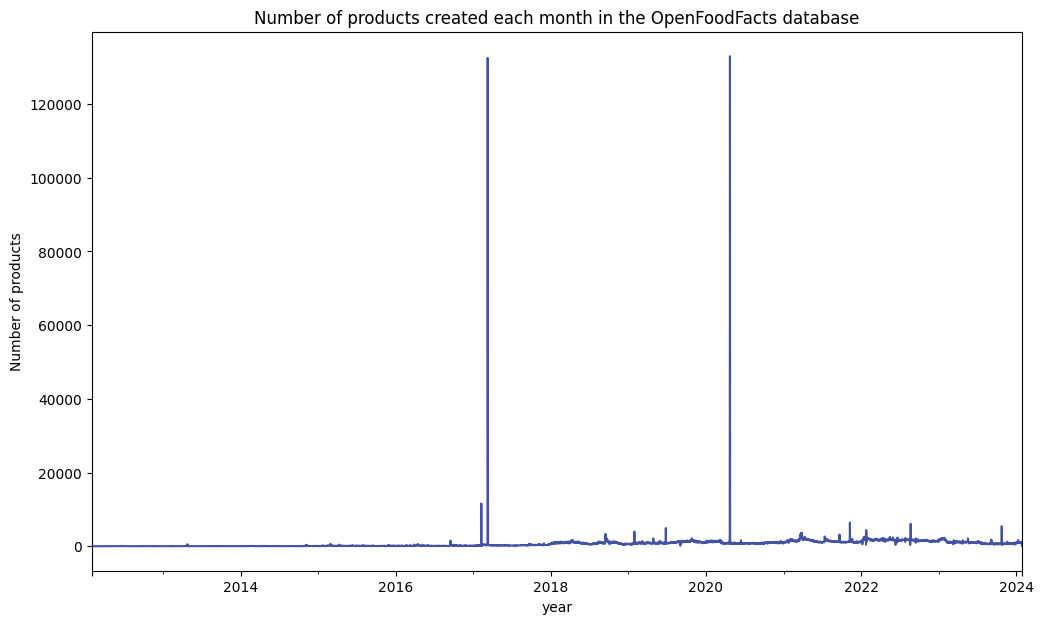

In [34]:
# Plot the number of products created each day
counts_per_day.plot(figsize=(12, 7), color='#4352a2')
plt.xlabel('year')
plt.ylabel('Number of products')
plt.title('Number of products created each month in the OpenFoodFacts database')
plt.show()


In [35]:
# Top 10 des jours avec le plus grand nombre de produits créés
top_10_days = counts_per_day.nlargest(10)


In [36]:
top_10_days

created_datetime
2020-04-23    132979
2017-03-09    132518
2017-03-10     37917
2017-02-07     11581
2021-11-09      6413
2022-08-22      6085
2023-10-25      5417
2019-06-26      4940
2022-01-25      4403
2019-01-29      3976
dtype: int64

In [24]:
# Resample the time-series to have the number of created items per month
counts_per_month = counts_per_day.resample('M').sum()
counts_per_month.head()

created_datetime
2012-01-31      1
2012-02-29     14
2012-03-31    171
2012-04-30    219
2012-05-31    458
Freq: M, dtype: int64

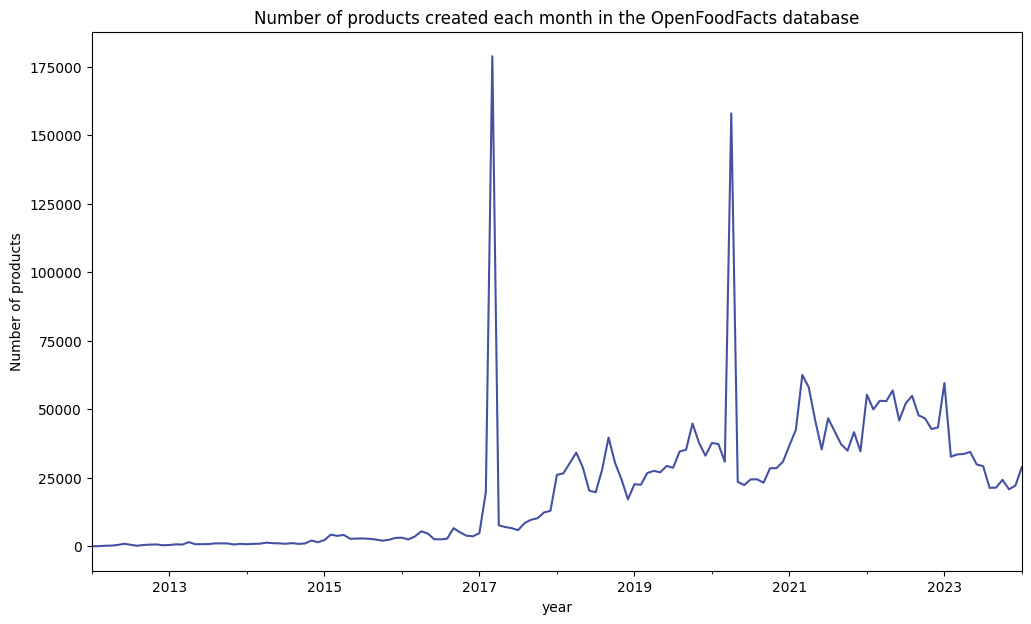

In [27]:
# Plot the number of products created each month
counts_per_month.plot(figsize=(12, 7), color='#4352a2')
plt.xlabel('year')
plt.ylabel('Number of products')
plt.title('Number of products created each month in the OpenFoodFacts database')
plt.show()

On voit qu'il y a eu des imports massif.

In [30]:
# identifier les jours avec le plus grand nombre de produits créés
max_day = counts_per_day.idxmax()
print(f"The day with the most products created is {max_day} with {counts_per_day[max_day]} products.")

The day with the most products created is 2020-04-23 00:00:00 with 132979 products.


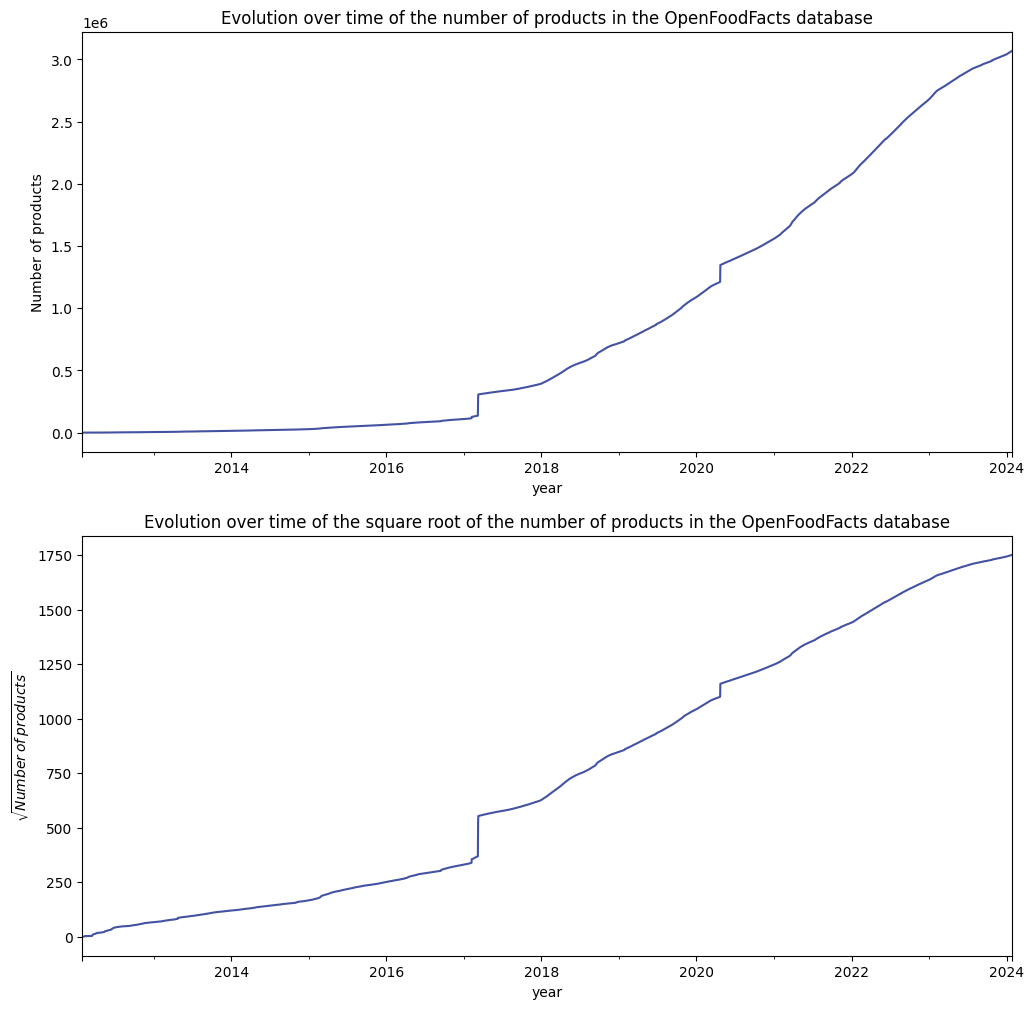

In [33]:
# Plot a cumulative sum of the number of products over time and also its square root 
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))
counts_per_day.cumsum().plot(ax=ax1, color='#4352a2')
np.sqrt(counts_per_day.cumsum()).plot(ax=ax2, color='#4352a2')
ax1.set_xlabel('year')
ax2.set_xlabel('year')
ax1.set_ylabel('Number of products')
ax2.set_ylabel('$\sqrt{Number\:of\:products}$')
ax1.set_title('Evolution over time of the number of products in the OpenFoodFacts database')
ax2.set_title('Evolution over time of the square root of the number of products in the OpenFoodFacts database')
plt.show()

Ajout du créateur dans le dataset

In [37]:
input_file = '../Datas/data.csv'
columns_to_extract = ['code','creator', 'created_datetime']

extract_columns(input_file, columns_to_extract)

In [38]:
df = pd.read_csv('data_code_creator_created_datetime.csv', encoding="utf-8")


In [39]:
df.head()

code         creator      created_datetime
0       00000000000000225  nutrinet-sante  2021-06-16T14:53:28Z
1  0000000000000207025004         kiliweb  2022-07-04T15:30:10Z
2    00000000000003429145         kiliweb  2021-09-01T08:11:51Z
3    00000000000026772226         kiliweb  2022-06-03T09:58:31Z
4           0000000000017         kiliweb  2018-06-15T10:38:00Z

In [41]:
# appliquer la fonction transformer_date() à la colonne 'created_datetime'
df['created_datetime'] = df['created_datetime'].apply(transformer_date)

In [42]:
df.head()

code         creator created_datetime
0       00000000000000225  nutrinet-sante       2021-06-16
1  0000000000000207025004         kiliweb       2022-07-04
2    00000000000003429145         kiliweb       2021-09-01
3    00000000000026772226         kiliweb       2022-06-03
4           0000000000017         kiliweb       2018-06-15

In [46]:
# top 20 des créateurs de produits, avec le nombre de produits créés
top_20_creators = df['creator'].value_counts().nlargest(20)
top_20_creators

creator
kiliweb                       1853358
openfoodfacts-contributors     194991
usda-ndb-import                169827
org-database-usda              134537
foodvisor                      107981
prepperapp                      80796
smoothie-app                    45209
foodless                        42807
elcoco                          36798
inf                             33958
date-limite-app                 32531
waistline-app                   22710
nutrinet-sante                  14726
openfood-ch-import              11457
sebleouf                        10455
halal-app-chakib                10127
swipe-studio                     9579
tacite                           8871
insectproductadd                 6079
tacinte                          5885
Name: count, dtype: int64

In [50]:
# Qui est le créateur de produits le plus prolifique à une date et nombre de produits créés
date = '2020-04-23'
most_prolific_creator = df[df['created_datetime'] == date]['creator'].value_counts().idxmax()
most_prolific_creator


'org-database-usda'

In [51]:
date = '2017-03-09'
most_prolific_creator = df[df['created_datetime'] == date]['creator'].value_counts().idxmax()
most_prolific_creator

'usda-ndb-import'

In [52]:
date = '2017-03-10'
most_prolific_creator = df[df['created_datetime'] == date]['creator'].value_counts().idxmax()
most_prolific_creator

'usda-ndb-import'

In [ ]:
2020-04-23    132979
2017-03-09    132518
2017-03-10     37917
2017-02-07     11581
2021-11-09      6413
2022-08-22      6085
2023-10-25      5417
2019-06-26      4940
2022-01-25      4403
2019-01-29      3976

In [53]:
date = '2017-02-07'
most_prolific_creator = df[df['created_datetime'] == date]['creator'].value_counts().idxmax()
most_prolific_creator

'openfood-ch-import'

In [ ]:
date = '2017-02-07'
most_prolific_creator = df[df['created_datetime'] == date]['creator'].value_counts().idxmax()
most_prolific_creator

In [55]:
# Afficher les 10 jours où le plus de produits ont été créés, ainsi que le nom du top créateur ce jour là, et le nomnre de produits créés ce jour là par ce créateur
top_10_days = counts_per_day.nlargest(10)
top_10_days_creators = {}
for day in top_10_days.index:
    top_creator = df[df['created_datetime'] == day]['creator'].value_counts().idxmax()
    top_10_days_creators[day] = (top_creator, df[(df['created_datetime'] == day) & (df['creator'] == top_creator)].shape[0])
    print(f"{day} : {top_creator} ({df[(df['created_datetime'] == day) & (df['creator'] == top_creator)].shape[0]} products)")

2020-04-23 00:00:00 : org-database-usda (132243 products)
2017-03-09 00:00:00 : usda-ndb-import (132185 products)
2017-03-10 00:00:00 : usda-ndb-import (37642 products)
2017-02-07 00:00:00 : openfood-ch-import (11457 products)
2021-11-09 00:00:00 : fitster (5172 products)
2022-08-22 00:00:00 : kiliweb (5756 products)
2023-10-25 00:00:00 : hibrido (4769 products)
2019-06-26 00:00:00 : foodvisor (4192 products)
2022-01-25 00:00:00 : kiliweb (3940 products)
2019-01-29 00:00:00 : foodrepo (3294 products)


In [56]:
# Afficher les 20 jours où le plus de produits ont été créés, ainsi que le nom du top créateur ce jour là, et le nomnre de produits créés ce jour là par ce créateur
top_20_days = counts_per_day.nlargest(20)
top_20_days_creators = {}
for day in top_20_days.index:
    top_creator = df[df['created_datetime'] == day]['creator'].value_counts().idxmax()
    top_20_days_creators[day] = (top_creator, df[(df['created_datetime'] == day) & (df['creator'] == top_creator)].shape[0])
    print(f"{day} : {top_creator} ({df[(df['created_datetime'] == day) & (df['creator'] == top_creator)].shape[0]} products)")

2020-04-23 00:00:00 : org-database-usda (132243 products)
2017-03-09 00:00:00 : usda-ndb-import (132185 products)
2017-03-10 00:00:00 : usda-ndb-import (37642 products)
2017-02-07 00:00:00 : openfood-ch-import (11457 products)
2021-11-09 00:00:00 : fitster (5172 products)
2022-08-22 00:00:00 : kiliweb (5756 products)
2023-10-25 00:00:00 : hibrido (4769 products)
2019-06-26 00:00:00 : foodvisor (4192 products)
2022-01-25 00:00:00 : kiliweb (3940 products)
2019-01-29 00:00:00 : foodrepo (3294 products)
2021-03-28 00:00:00 : kiliweb (1866 products)
2021-03-23 00:00:00 : kiliweb (3280 products)
2018-09-15 00:00:00 : openfoodfacts-contributors (1979 products)
2021-03-21 00:00:00 : kiliweb (3009 products)
2021-09-21 00:00:00 : tarik-tire (1975 products)
2021-03-24 00:00:00 : kiliweb (2908 products)
2020-04-22 00:00:00 : org-database-usda (2293 products)
2021-03-22 00:00:00 : kiliweb (2776 products)
2021-03-20 00:00:00 : kiliweb (2747 products)
2018-09-14 00:00:00 : openfoodfacts-contributors

# Données textuelles

In [60]:
#charger une fraction des lignes du dataset

df = pd.read_csv('../Datas/data.csv', delimiter = '\t',encoding="utf-8", nrows=100000, low_memory=False)


In [59]:
def get_unique_values_and_maxlength(dataset, column_name):
    """
    Compute unique values and maximum length for a given column of a dataset
    
    Args:
        dataset(dataset): A dataset with variables
        column_name(string): A column name
        
    Returns:
        A tuple containing a list of unique values for the given column
        and the maximum length of the values
    """
    unique_values = list(dataset[column_name].unique())
    max_length = max([len(str(value)) for value in unique_values])
    return  max_length, unique_values

In [66]:
get_unique_values_and_maxlength(df, 'countries_tags')

(156,
 ['en:france',
  'en:germany',
  'en:spain',
  'en:united-states',
  'en:ireland',
  nan,
  'en:belgium',
  'en:united-kingdom',
  'en:france,en:united-states',
  'en:switzerland,en:united-states',
  'en:cote-d-ivoire',
  'en:canada',
  'en:germany,en:world',
  'en:ukraine',
  'en:france,en:germany',
  'en:switzerland',
  'en:italy',
  'en:belgium,en:france',
  'en:peru',
  'en:thailand',
  'en:oman',
  'en:slovenia',
  'en:france,en:germany,en:netherlands',
  'en:kuwait',
  'en:belgium,en:germany',
  'en:united-arab-emirates',
  'en:france,en:switzerland',
  'en:india',
  'en:romania',
  'en:australia',
  'en:germany,en:spain',
  'en:malaysia',
  'en:luxembourg',
  'en:austria',
  'en:united-kingdom,en:united-states',
  'en:portugal',
  'en:russia',
  'en:mexico',
  'en:dominican-republic',
  'en:pakistan',
  'en:reunion',
  'en:hungary',
  'en:martinique',
  'en:poland',
  'en:germany,en:united-states',
  'en:slovakia',
  'en:germany,en:united-kingdom',
  'en:moldova',
  'en:is

In [67]:
get_unique_values_and_maxlength(df, 'allergens')

(106,
 [nan,
  'en:mustard',
  'en:eggs,en:mustard',
  'en:gluten,en:milk',
  'en:fish,en:gluten,en:milk',
  'en:milk',
  'en:gluten,en:sesame-seeds',
  'en:eggs,en:gluten',
  'en:soybeans',
  'en:milk,en:nuts',
  'en:none',
  'en:eggs,en:gluten,en:milk,en:nuts',
  'en:nuts',
  'en:milk,en:nuts,en:soybeans',
  'en:sulphur-dioxide-and-sulphites',
  'en:gluten',
  'en:milk,en:nuts,en:soybeans,de:Pisatazien',
  'en:gluten,en:milk,en:nuts',
  'en:gluten,en:milk,en:nuts,en:Barley Malt Extract',
  'en:milk,en:peanuts,en:soybeans',
  'en:eggs,en:gluten,en:milk',
  'en:eggs,en:gluten,en:milk,en:soybeans',
  'en:celery',
  'en:milk,en:soybeans,de:Hühnereiweiss,de:Weizenprotein,de:Wheyprotein',
  'en:soybeans,en:sulphur-dioxide-and-sulphites',
  'en:milk,en:soybeans',
  'en:fish,en:gluten,en:milk,en:soybeans',
  'de:Wheyproteinkonzentrat',
  'en:fish',
  'en:milk,en:peanuts',
  'en:gluten,en:milk,en:peanuts,en:soybeans',
  'en:celery,en:milk',
  'en:eggs,en:gluten,en:mustard,en:sulphur-dioxide-a

In [71]:
get_unique_values_and_maxlength(df, 'ingredients_tags')

(4308,
 [nan,
  'en:semi-skimmed-milk,en:dairy,en:milk,en:sugar,en:added-sugar,en:disaccharide,es:leche-desnatada-en-polva,en:lactic-ferments,en:ferment,en:microbial-culture,en:vitamins,en:vitamin-b6,en:vitamin-d,es:contiene-lactobacidus-casei',
  'en:beta-alanine,en:creatine-hcl,en:ancient-peat-and-apple-extract,en:l-leucine,en:l-isoleucine,en:l-valine,en:betaine-anhydrous,en:arginine-silicate-inositol,en:cordyceps-militaris,en:ganoderma-lucidum,en:pleurotus-eryngii,en:shiitake,en:mushroom,en:hericium-erinaceus,en:and-trametes-veriscolor,en:phyllanthus-emblica,en:extract,en:nattokinase,en:1000-fu,en:of-enzyme-activity,en:aframomum-melegueta,en:caffeine-anhydrous,en:methyliberine,en:theacrine,en:e330,en:natural-and-artificial-flavouring,en:flavouring,en:natural-flavouring,en:artificial-flavouring,en:e296,en:soluble-corn-fiber,en:cereal,en:corn,en:corn-fiber,en:e955,en:e950,en:e552,en:e551,en:fd-c-blue-lake-1,en:as-elevatp,en:as-nitrosigine,en:cordyceps,en:reishi,en:king-trumpet,en:shit

In [73]:
get_unique_values_and_maxlength(df, 'additives_tags')

(311,
 [nan,
  'en:e296,en:e330,en:e552,en:e950,en:e955',
  'en:e150,en:e160a,en:e202,en:e316,en:e466',
  'en:e406',
  'en:e300,en:e503',
  'en:e202',
  'en:e500,en:e500ii,en:e503,en:e503ii',
  'en:e250,en:e252',
  'en:e14xx,en:e262,en:e262i,en:e326',
  'en:e306',
  'en:e322,en:e322i',
  'en:e330',
  'en:e322,en:e322i,en:e410',
  'en:e422',
  'en:e1422,en:e450,en:e472b,en:e472e,en:e475,en:e481,en:e500,en:e500ii',
  'en:e160b,en:e422',
  'en:e341,en:e341i,en:e500,en:e500ii',
  'en:e415',
  'en:e322,en:e322i,en:e500,en:e500ii',
  'en:e322,en:e322i,en:e471,en:e500,en:e500ii',
  'en:e220',
  'en:e160a,en:e322,en:e322i,en:e330,en:e450,en:e500,en:e500ii,en:e503',
  'en:e322,en:e322i,en:e965',
  'en:e202,en:e330,en:e331,en:e331iii,en:e955',
  'en:e14xx,en:e451,en:e451i',
  'en:e341,en:e341i,en:e415,en:e517',
  'en:e1100,en:e202,en:e203,en:e330,en:e406,en:e410,en:e420,en:e440',
  'en:e102,en:e110,en:e407,en:e471',
  'en:e170,en:e170i,en:e270,en:e296,en:e330',
  'en:e202,en:e211,en:e330',
  'en

In [74]:
get_unique_values_and_maxlength(df, 'additives_en')

(940,
 [nan,
  'E296 - Malic acid,E330 - Citric acid,E552 - Calcium silicate,E950 - Acesulfame k,E955 - Sucralose',
  'E150 - Caramel,E160a - Carotene,E202 - Potassium sorbate,E316 - Sodium erythorbate,E466 - Sodium carboxy methyl cellulose',
  'E406 - Agar',
  'E300 - Ascorbic acid,E503 - Ammonium carbonates',
  'E202 - Potassium sorbate',
  'E500 - Sodium carbonates,E500ii - Sodium hydrogen carbonate,E503 - Ammonium carbonates,E503ii - Ammonium hydrogen carbonate',
  'E250 - Sodium nitrite,E252 - Potassium nitrate',
  'E14XX - Modified Starch,E262 - Sodium acetates,E262i - Sodium acetate,E326 - Potassium lactate',
  'E306 - Tocopherol-rich extract',
  'E322 - Lecithins,E322i - Lecithin',
  'E330 - Citric acid',
  'E322 - Lecithins,E322i - Lecithin,E410 - Locust bean gum',
  'E422 - Glycerol',
  'E1422 - Acetylated distarch adipate,E450 - Diphosphates,E472b - Lactic acid esters of mono- and diglycerides of fatty acids,E472e - Mono- and diacetyltartaric acid esters of mono- and diglyce

In [90]:
get_unique_values_and_maxlength(df, 'main_category_en')

(256,
 ['Spinach young leaves',
  nan,
  'Cream cheeses',
  'Groceries',
  'Squeezed apple juices',
  'Almond paste',
  'Seasoned grated carrots',
  'Coconut pies',
  'Pear compotes',
  'fr:Aiguillettes de poulet',
  'Vegetables macedoines',
  'Milk jams',
  'White teas',
  'Apricot nectars',
  'Abondance',
  'Chicken thighs',
  'Bagel breads',
  'Baguettes',
  'fr:paves-de-saumon-fume',
  'Mung beans',
  'Corned-beef',
  'Cheeses',
  'Thyme honeys',
  'Salmon steaks',
  'fr:Fromages blancs',
  'Shortbread cookies from Brittany',
  'Blackberry jams',
  'fr:miels-de-printemps',
  'Salads',
  'Wild boar rillettes',
  'Dried mixed fruits',
  'Dietary supplements',
  'Duck rillettes',
  'fr:filet-de-boeuf',
  'Hazelnut spreads',
  'Butter beans',
  'Bars covered with chocolate',
  'Cranberries',
  'Teas',
  'Food decorations',
  'Honeys',
  'Honey of Corsica',
  'Huile-d-olive-vierge-extra',
  'Turkey dishes',
  'Microwave meals',
  'Leaf vegetables',
  'Flavoured olive oils',
  'fr:gateau